# ANALISIS INICIAL DE LOS DATOS

In [1]:
# Importamos librerias necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from plotly.subplots import make_subplots
import requests
import io

In [2]:
# Para poder abrir los archivos con la url
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
# Cargamos el dataset de listing pero en formato gz, tambien el data de review y el data de listing pero solo CSV
df_listings = pd.read_csv('https://data.insideairbnb.com/spain/catalonia/barcelona/2024-03-20/data/listings.csv.gz')
df_neighbourhoods = pd.read_csv(r'https://data.insideairbnb.com/spain/catalonia/barcelona/2024-03-20/visualisations/neighbourhoods.csv')
df_reviews = pd.read_csv (r'https://data.insideairbnb.com/spain/catalonia/barcelona/2024-03-20/data/reviews.csv.gz')
df_calendar = pd.read_csv(r'https://data.insideairbnb.com/spain/catalonia/barcelona/2024-03-20/data/calendar.csv.gz')

# la url de la página es la siguiente: https://insideairbnb.com/get-the-data/

/var/folders/qz/_32xyxhj33x5fkccrdmk10580000gn/T/ipykernel_58452/2027385552.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_calendar = pd.read_csv(r'https://data.insideairbnb.com/spain/catalonia/barcelona/2024-03-20/data/calendar.csv.gz')


In [4]:
# Mostrar todas las columnas y filas de nuestro dataframes
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Configuración del formato de numeros
pd.options.display.float_format = '{:.2f}'.format

In [5]:
# Hacemos una copia de los dataframe antes de eliminar o modificar los datos

df_listings_copy = df_listings.copy()
df_neighbourhoods_copy = df_neighbourhoods.copy()
df_reviews_copy = df_reviews.copy()
df_calendar_copy = df_calendar.copy()

# **LIMPIEZA DATAFRAMES**
Disponemos de los siguientes dataframe:
- df_calendar
- df_reviews
- df_neighbourhoods
- df_listings

### **DF_CALENDAR**

In [6]:
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,97529,2024-03-20,f,$47.00,NaN,120,1125
1,360863,2024-03-20,f,$50.00,NaN,31,150
2,360863,2024-03-21,f,$50.00,NaN,31,150
3,360863,2024-03-22,f,$50.00,NaN,31,150
4,360863,2024-03-23,f,$50.00,NaN,31,150


In [7]:
df_calendar.shape

(6759363, 7)

In [8]:
df_calendar.isnull().sum()

listing_id              0
date                    0
available               0
price                   0
adjusted_price    6758633
minimum_nights          0
maximum_nights          0
dtype: int64

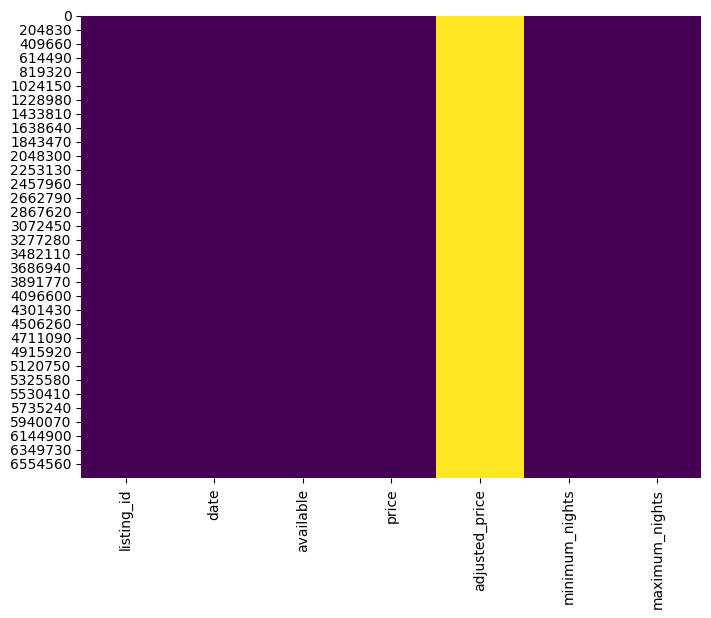

In [9]:
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 6))

# Crear un heatmap de los valores nulos en el DataFrame
sns.heatmap(df_calendar.isnull(), cbar=False, cmap='viridis', ax=ax)

# Configurar las etiquetas y el tamaño de la fuente
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar la figura
plt.show()

In [10]:
# Convertimos columna 'price' de tipo objeto a tipo numérico flotante.
df_calendar['price'] = df_calendar['price'].str.replace('[^\d.]', '', regex=True).astype(float)

Podemos ver que tenemos casi todos los valores nulos dentro de al columna 'adjusted_price', por lo que eliminaremos la columna.

In [11]:
# Eliminamos la columna
df_calendar.drop(['adjusted_price'], axis=1,inplace=True)

In [12]:
df_calendar.isnull().sum()

listing_id        0
date              0
available         0
price             0
minimum_nights    0
maximum_nights    0
dtype: int64

Ya no tenemos valores nulos dentro de calendar, por lo que podemos utilizarlo para nuestro analisis

### **DF_NEIGHBOURHOODS**

In [13]:
df_neighbourhoods.head()

,neighbourhood_group,neighbourhood
0,Ciutat Vella,el Barri Gòtic
1,Ciutat Vella,el Raval
2,Ciutat Vella,la Barceloneta
3,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera"
4,Eixample,el Fort Pienc


In [14]:
df_neighbourhoods.isnull().sum()

neighbourhood_group    0
neighbourhood          0
dtype: int64

No tenemos valores nulos dentro del dataframe neighbourhoods  por lo tanto podemos utilizarlo para nuestro analisis.

In [15]:
df_neighbourhoods['neighbourhood_group'].unique()

array(['Ciutat Vella', 'Eixample', 'Gràcia', 'Horta-Guinardó',
       'Les Corts', 'Nou Barris', 'Sant Andreu', 'Sant Martí',
       'Sants-Montjuïc', 'Sarrià-Sant Gervasi'], dtype=object)

Dataframe neighbourghood no será utilizado en nuestro analisis, por lo tanto, podemos prescindir del dataframes.

### **DF_REVIEWS**

In [16]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,360863,1124282,2012-04-13,1853183,Anna,We stayed at Humberto's apartment for 9 days ...
1,17475,63134,2010-07-10,141807,Zoltan,"Excellent host, beautiful apartment, great loc..."
2,17475,83802,2010-08-24,68687,John,"Luca is very personable, and the views are exa..."
3,17475,98998,2010-09-17,96055,Xiaoyang,I am glad we found Luca's apt for our stay in ...
4,17475,105280,2010-09-26,171084,Amy,I should start by saying we really did not wan...


In [17]:
df_reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         75
dtype: int64

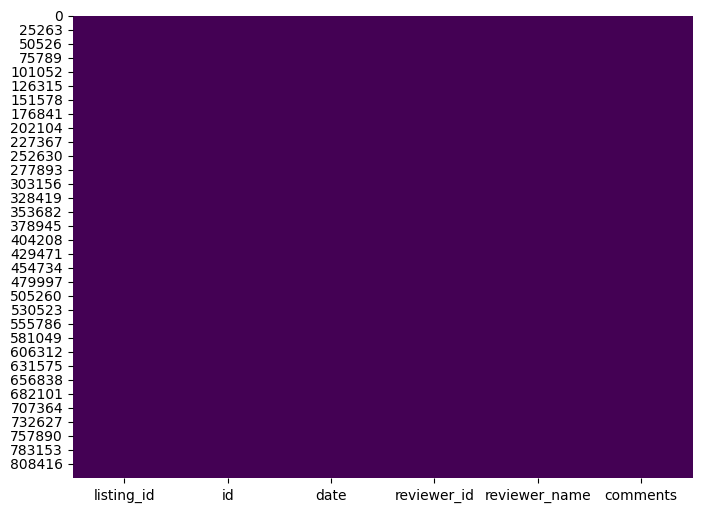

In [18]:
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 6))

# Crear un heatmap de los valores nulos en el DataFrame
sns.heatmap(df_reviews.isnull(), cbar=False, cmap='viridis', ax=ax)

# Configurar las etiquetas y el tamaño de la fuente
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar la figura
plt.show()

In [19]:
df_reviews.isnull().sum()/len(df_reviews)*100

listing_id      0.00
id              0.00
date            0.00
reviewer_id     0.00
reviewer_name   0.00
comments        0.01
dtype: float64

Como solo tenemos 67 comentarios como valores nulos, y representan un 0,01 % de la data, eleminares esas filas para poder tener el dataframe sin valores nulos.

In [20]:
df_reviews.dropna(subset=['comments'], inplace=True)

In [21]:
# Comprobamos si tenemos valores nulos
df_reviews.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

Como podemos ver, ya no tenemos valores nulos dentro de nuestro dataframe df_reviews

### **DF_LISTINGS**

In [22]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,360863,https://www.airbnb.com/rooms/360863,20240320024717,2024-03-20,previous scrape,SPECIAL OFFER @ COSY AND CHARMING,Fully furnished and renovated apartment in the...,The Barceloneta is a triangular spit of land t...,https://a0.muscache.com/pictures/4378248/3e40f...,1824328,https://www.airbnb.com/users/show/1824328,Umberto,2012-02-28,"Barcelona, Spain",I am passionate about traveling and discoverin...,NaN,NaN,57%,t,https://a0.muscache.com/im/users/1824328/profi...,https://a0.muscache.com/im/users/1824328/profi...,La Barceloneta,2.00,4.00,"['email', 'phone']",t,f,"Barcelona, Catalonia, Spain",la Barceloneta,Ciutat Vella,41.38,2.20,Private room in rental unit,Private room,2,NaN,1 private bath,NaN,NaN,"[""Cleaning available during stay"", ""Baking she...",NaN,31,150,31,31,150,150,31.00,150.00,NaN,NaN,0,0,0,0,2024-03-20,32,0,0,2012-04-13,2015-10-21,4.73,4.84,4.84,4.91,4.94,4.71,4.74,NaN,f,2,1,1,0,0.22
1,17475,https://www.airbnb.com/rooms/17475,20240320024717,2024-03-20,city scrape,Attic Sagrada Familia,Beautiful attic apartment <br />with large ter...,NaN,https://a0.muscache.com/pictures/f6e6718f-dba0...,65623,https://www.airbnb.com/users/show/65623,Luca,2009-12-25,"Rome, Italy",Italian.,within a few hours,100%,82%,f,https://a0.muscache.com/im/pictures/user/989d6...,https://a0.muscache.com/im/pictures/user/989d6...,Dreta de l'Eixample,2.00,6.00,"['email', 'phone']",t,t,NaN,la Dreta de l'Eixample,Eixample,41.40,2.17,Entire rental unit,Entire home/apt,3,1.00,1 bath,1.00,1.00,"[""Microwave"", ""Outdoor dining area"", ""Private ...",$165.00,3,90,3,3,90,90,3.00,90.00,NaN,t,0,0,0,7,2024-03-20,29,12,1,2010-07-10,2024-03-01,4.48,4.73,4.23,4.82,4.73,4.82,4.50,NaN,f,1,1,0,0,0.17
2,18674,https://www.airbnb.com/rooms/18674,20240320024717,2024-03-20,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,https://www.airbnb.com/users/show/71615,Mireia Maria,2010-01-19,"Barcelona, Spain","We are Mireia (47) & Maria (49), two multiling...",within an hour,97%,85%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,la Sagrada Família,44.00,46.00,"['email', 'phone']",t,t,"Barcelona, CT, Spain",la Sagrada Família,Eixample,41.41,2.17,Entire rental unit,Entire home/apt,8,2.00,2 baths,3.00,6.00,"[""Paid parking on premises"", ""Private patio or...",$210.00,1,1125,1,4,1125,1125,2.90,1125.00,NaN,t,18,41,63,252,2024-03-20,40,6,0,2013-05-27,2023-11-07,4.33,4.44,4.62,4.74,4.67,4.77,4.28,HUTB-002062,t,28,28,0,0,0.30
3,97529,https://www.airbnb.com/roo

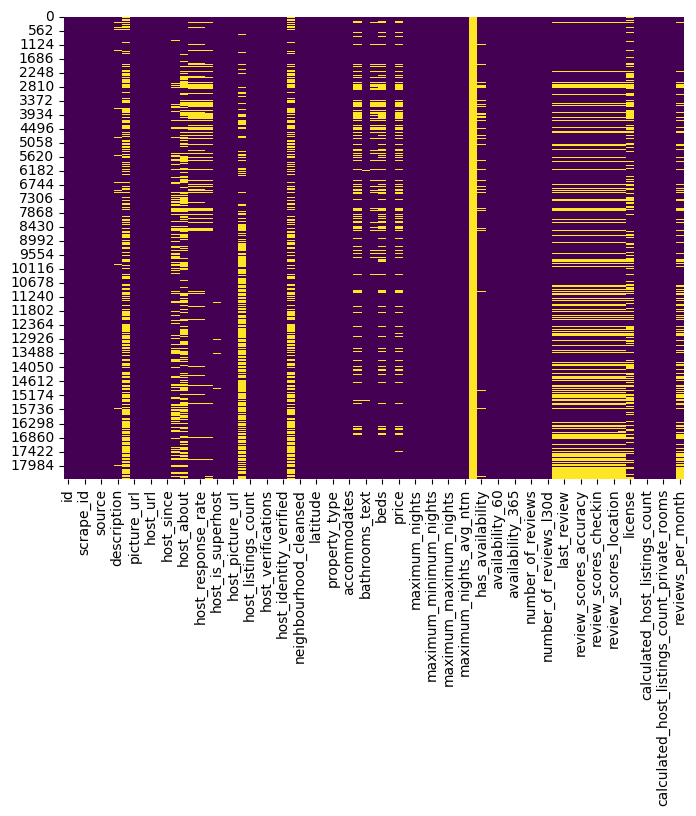

In [23]:
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 6))

# Crear un heatmap de los valores nulos en el DataFrame
sns.heatmap(df_listings.isnull(), cbar=False, cmap='viridis', ax=ax)

# Configurar las etiquetas y el tamaño de la fuente
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar la figura
plt.show()

In [24]:
# Vemos las columnas del dataframe
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [25]:
# Las columnas que vamos a tener en cuenta para nuestro estudio son las siguientes:
target_columns = [
    'id', 'listing_url', 'name', 'neighbourhood_cleansed','neighbourhood_group_cleansed', 'property_type', 'room_type', 'latitude', 'longitude',
    'price', 'minimum_nights', 'maximum_nights', 'accommodates', 'bedrooms', 'beds', 'bathrooms', 'amenities',
    'number_of_reviews', 'number_of_reviews_ltm', 'reviews_per_month', 'review_scores_rating', 'review_scores_cleanliness',
    'review_scores_communication', 'review_scores_location', 'review_scores_value', 'host_is_superhost', 'host_response_rate',
    'host_listings_count','availability_365', 'calculated_host_listings_count'
]


# Creamos un nuevo dataframe con las columnas objetivo
df_listings = df_listings[target_columns]
df_listings.head()

,id,listing_url,name,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,price,minimum_nights,maximum_nights,accommodates,bedrooms,beds,bathrooms,amenities,number_of_reviews,number_of_reviews_ltm,reviews_per_month,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,host_is_superhost,host_response_rate,host_listings_count,availability_365,calculated_host_listings_count
0,360863,https://www.airbnb.com/rooms/360863,SPECIAL OFFER @ COSY AND CHARMING,la Barceloneta,Ciutat Vella,Private room in rental unit,Private room,41.38,2.20,NaN,31,150,2,NaN,NaN,NaN,"[""Cleaning available during stay"", ""Baking she...",32,0,0.22,4.73,4.84,4.94,4.71,4.74,t,NaN,2.00,0,2
1,17475,https://www.airbnb.com/rooms/17475,Attic Sagrada Familia,la Dreta de l'Eixample,Eixample,Entire rental unit,Entire home/apt,41.40,2.17,$165.00,3,90,3,1.00,1.00,1.00,"[""Microwave"", ""Outdoor dining area"", ""Private ...",29,12,0.17,4.48,4.23,4.73,4.82,4.50,f,100%,2.00,7,1
2,18674,https://www.airbnb.com/rooms/18674,Huge flat for 8 people close to Sagrada Familia,la Sagrada Família,Eixample,Entire rental unit,Entire home/apt,41.41,2.17,$210.00,1,1125,8,3.00,6.00,2.00,"[""Paid parking on premises"", ""Private patio or...",40,6,0.30,4.33,4.62,4.67,4.77,4.28,f,97%,44.00,252,28
3,97529,https://www.airbnb.com/rooms/97529,Furnished one bedroom apartment with bathroom,el Camp d'en Grassot i Gràcia Nova,Gràcia,Entire rental unit,Entire home/apt,41.41,2.17,NaN,120,1125,2,1.00,NaN,NaN,"[""Microwave"", ""Paid parking off premises"", ""Pr...",67,0,0.45,4.74,4.86,4.91,4.45,4.71,f,NaN,1.00,0,1
4,110041,https://www.airbnb.com/rooms/110041,002. Alió 2 Apartment,el Camp d'en Grassot i Gràcia Nova,Gràcia,Entire rental unit,Entire home/apt,41.40,2.17,$94.00,1,1125,4,1.00,2.00,1.00,"[""Microwave"", ""Iron"", ""Dedicated workspace"", ""...",54,18,0.38,4.17,4.24,4.41,4.65,4.11,f,100%,114.00,226,95


In [26]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18519 entries, 0 to 18518
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18519 non-null  int64  
 1   listing_url                     18519 non-null  object 
 2   name                            18519 non-null  object 
 3   neighbourhood_cleansed          18519 non-null  object 
 4   neighbourhood_group_cleansed    18519 non-null  object 
 5   property_type                   18519 non-null  object 
 6   room_type                       18519 non-null  object 
 7   latitude                        18519 non-null  float64
 8   longitude                       18519 non-null  float64
 9   price                           14656 non-null  object 
 10  minimum_nights                  18519 non-null  int64  
 11  maximum_nights                  18519 non-null  int64  
 12  accommodates                    

In [27]:
# Convertimos columna 'price' de tipo objeto a tipo numérico flotante.
df_listings['price'] = df_listings['price'].str.replace('[^\d.]', '', regex=True).astype(float)

In [28]:
df_listings.isnull().sum()

id                                   0
listing_url                          0
name                                 0
neighbourhood_cleansed               0
neighbourhood_group_cleansed         0
property_type                        0
room_type                            0
latitude                             0
longitude                            0
price                             3863
minimum_nights                       0
maximum_nights                       0
accommodates                         0
bedrooms                          2000
beds                              3930
bathrooms                         3851
amenities                            0
number_of_reviews                    0
number_of_reviews_ltm                0
reviews_per_month                 4757
review_scores_rating              4756
review_scores_cleanliness         4758
review_scores_communication       4757
review_scores_location            4761
review_scores_value               4761
host_is_superhost        

<Axes: >

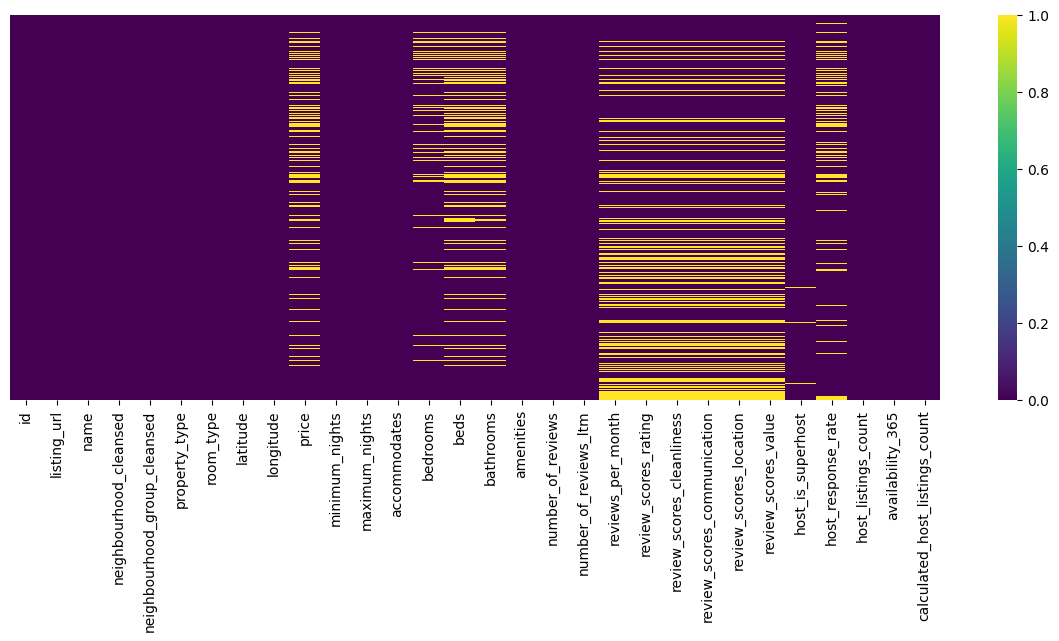

In [29]:
# Graficamos los valores nulos
plt.figure(figsize=(15, 5))
sns.heatmap(df_listings.isnull(), yticklabels=False, cbar=True, cmap="viridis")

In [30]:
df_listings.head()

,id,listing_url,name,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,price,minimum_nights,maximum_nights,accommodates,bedrooms,beds,bathrooms,amenities,number_of_reviews,number_of_reviews_ltm,reviews_per_month,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,host_is_superhost,host_response_rate,host_listings_count,availability_365,calculated_host_listings_count
0,360863,https://www.airbnb.com/rooms/360863,SPECIAL OFFER @ COSY AND CHARMING,la Barceloneta,Ciutat Vella,Private room in rental unit,Private room,41.38,2.20,NaN,31,150,2,NaN,NaN,NaN,"[""Cleaning available during stay"", ""Baking she...",32,0,0.22,4.73,4.84,4.94,4.71,4.74,t,NaN,2.00,0,2
1,17475,https://www.airbnb.com/rooms/17475,Attic Sagrada Familia,la Dreta de l'Eixample,Eixample,Entire rental unit,Entire home/apt,41.40,2.17,165.00,3,90,3,1.00,1.00,1.00,"[""Microwave"", ""Outdoor dining area"", ""Private ...",29,12,0.17,4.48,4.23,4.73,4.82,4.50,f,100%,2.00,7,1
2,18674,https://www.airbnb.com/rooms/18674,Huge flat for 8 people close to Sagrada Familia,la Sagrada Família,Eixample,Entire rental unit,Entire home/apt,41.41,2.17,210.00,1,1125,8,3.00,6.00,2.00,"[""Paid parking on premises"", ""Private patio or...",40,6,0.30,4.33,4.62,4.67,4.77,4.28,f,97%,44.00,252,28
3,97529,https://www.airbnb.com/rooms/97529,Furnished one bedroom apartment with bathroom,el Camp d'en Grassot i Gràcia Nova,Gràcia,Entire rental unit,Entire home/apt,41.41,2.17,NaN,120,1125,2,1.00,NaN,NaN,"[""Microwave"", ""Paid parking off premises"", ""Pr...",67,0,0.45,4.74,4.86,4.91,4.45,4.71,f,NaN,1.00,0,1
4,110041,https://www.airbnb.com/rooms/110041,002. Alió 2 Apartment,el Camp d'en Grassot i Gràcia Nova,Gràcia,Entire rental unit,Entire home/apt,41.40,2.17,94.00,1,1125,4,1.00,2.00,1.00,"[""Microwave"", ""Iron"", ""Dedicated workspace"", ""...",54,18,0.38,4.17,4.24,4.41,4.65,4.11,f,100%,114.00,226,95


#### CORRECCION DATOS CON KNN

In [31]:
# Comprobamos que no tenemos duplicados
df_listings.duplicated().sum()

0

In [32]:
df_listings.columns

Index(['id', 'listing_url', 'name', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'latitude', 'longitude', 'price', 'minimum_nights', 'maximum_nights',
       'accommodates', 'bedrooms', 'beds', 'bathrooms', 'amenities',
       'number_of_reviews', 'number_of_reviews_ltm', 'reviews_per_month',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'host_is_superhost', 'host_response_rate',
       'host_listings_count', 'availability_365',
       'calculated_host_listings_count'],
      dtype='object')

In [33]:
# FUNCION GENERICA CODIFICAR COLUMNAS CATEGORIAS
"""
Esta función se encarga de codificar todas las columnas categóricas (de tipo object)
en un DataFrame utilizando codificación por etiquetas (Label Encoding
"""
def CODIFICAR_CATEGORICAS(df):
    """
    Given a pandas DataFrame, encodes all categorical (object) columns using
    Label Encoding and returns a copy of the encoded DataFrame.
    Parameters:
    - df: pandas DataFrame
    Returns:
    - df_encoded: pandas DataFrame
    """
    df_encoded = df.copy()  # Make a copy of the original DataFrame
    # Select the categorical columns of the DataFrame
    object_columns = df_encoded.select_dtypes(include=["object"]).columns
    encoder_info = []  # Initialize a list to store the encoder information

    for column in object_columns:
        # Convert the column to a categorical type
        df_encoded[column] = pd.Categorical(df_encoded[column])

        # Get the codes and categories
        df_encoded[column] = df_encoded[column].cat.codes

        # Replace -1 with NaN to handle missing values
        df_encoded[column] = df_encoded[column].replace(-1, np.nan)

        encoder_info.append(
            {  # Store the encoder information in a dictionary
                "column": column,
                "labels": list(df[column].astype('category').cat.categories),  # List the original labels
                "codes": list(range(len(df[column].astype('category').cat.categories))),  # List the encoded codes
            }
        )

    # Return the encoded DataFrame and the encoder information
    return df_encoded, encoder_info

In [34]:
# Aplicamos la función sobre nuestro dataframe
df_encoded, encoded_info = CODIFICAR_CATEGORICAS (df_listings)

In [35]:
# FUNCIÓN GENERICA ENTRAR MEJOR K PARA KNN

"""
Esta función realiza una regresión con k-vecinos más cercanos (K-NN) usando
validación cruzada para encontrar el mejor valor de k (número de vecinos)
basado en el error cuadrático medio.
"""

def BEST_K(df, target_column, min_k=2, max_k=15):
    """
    Given a pandas DataFrame, a target column name, a range of k values and a
    minimum number of samples per fold, performs K-NN regression using cross-validation
    to find the best value of k (number of neighbors) based on the mean squared error.
    Parameters:
    - df: pandas DataFrame
    - target_column: str, name of the target column
    - min_k: int, minimum number of neighbors to consider
    - max_k: int, maximum number of neighbors to consider
    Returns:
    - best_k: int, best value of k found
    """
    # Instantiate a LabelEncoder object
    le = LabelEncoder()
    # Make a copy of the input DataFrame
    df_encoded = df.copy()
    # Select object columns (categorical) of df_encoded
    object_columns = df_encoded.select_dtypes(include=["object"]).columns
    # Iterate over each categorical column and apply Label Encoding
    for column in object_columns:
        df_encoded[column] = le.fit_transform(df_encoded[column].astype(str))
    # Impute missing values using the mean of each column
    imputer = SimpleImputer(strategy="mean")
    df_imputed = pd.DataFrame(
        imputer.fit_transform(df_encoded), columns=df_encoded.columns
    )
    # Separate the predictors (X) from the target (y)
    X = df_imputed.drop(target_column, axis=1)
    y = df_imputed[target_column]
    # Define a pipeline for K-NN regression
    pipeline = Pipeline(steps=[("model", KNeighborsRegressor(n_neighbors=3))])
    # Set the hyperparameters to tune
    params = {
        "model__n_neighbors": [3, 5, 7],
        "model__weights": ["uniform", "distance"],
    }
    best_k = 0
    best_score = -np.inf
    # Iterate over a range of k values and perform cross-validation
    for k in range(min_k, max_k + 1):
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        grid_search = GridSearchCV(
            pipeline, params, cv=kf, scoring="neg_mean_squared_error", n_jobs=-1
        )
        grid_search.fit(X, y)
        # Keep track of the best k and best score found so far
        if grid_search.best_score_ > best_score:
            best_score = grid_search.best_score_
            best_k = k
    # Return the best value of k found
    return best_k

In [36]:
# Fijamos la columna objetivo
target_column = 'price'

# Llamamos a la función para encontrar el mejor K
bestkar= BEST_K(df_encoded,target_column)

bestkar

11

In [37]:
# FUNCION GENERICA IMPUTA VALORES FALTANTES DE DF CON KNN

"""
Esta función imputa los valores faltantes en un DataFrame
utilizando un imputador K-NN (KNN Imputer).
"""

def IMPUTAR_BEST_K_DF(df, n_neighbors):
    """
    Impute missing values in a DataFrame using KNN imputer.

    Parameters:
    - df: pandas DataFrame with numerical and encoded categorical columns
    - n_neighbors: int, number of neighbors to use for KNN imputation

    Returns:
    - df_imputed: pandas DataFrame with missing values imputed
    """
    df_imputed = df.copy()

    # Replace -1 with NaN before imputing
    df_imputed.replace(-1, np.nan, inplace=True)

    imputer = KNNImputer(n_neighbors=n_neighbors)
    df_imputed[df_imputed.columns] = imputer.fit_transform(df_imputed)

    return df_imputed


In [38]:
# Llamamos a la función impute_missing_value_with_knn
df_imputed = IMPUTAR_BEST_K_DF(df_encoded, bestkar)

In [39]:
# Comprobamos si tenemos valores nulos
df_imputed.isnull().sum()

id                                0
listing_url                       0
name                              0
neighbourhood_cleansed            0
neighbourhood_group_cleansed      0
property_type                     0
room_type                         0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
maximum_nights                    0
accommodates                      0
bedrooms                          0
beds                              0
bathrooms                         0
amenities                         0
number_of_reviews                 0
number_of_reviews_ltm             0
reviews_per_month                 0
review_scores_rating              0
review_scores_cleanliness         0
review_scores_communication       0
review_scores_location            0
review_scores_value               0
host_is_superhost                 0
host_response_rate                0
host_listings_count         

In [40]:
# Vemos todas las variables y las transformación de variables categoricas
df_imputed.head()

,id,listing_url,name,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,price,minimum_nights,maximum_nights,accommodates,bedrooms,beds,bathrooms,amenities,number_of_reviews,number_of_reviews_ltm,reviews_per_month,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,host_is_superhost,host_response_rate,host_listings_count,availability_365,calculated_host_listings_count
0,360863.00,7366.00,14346.00,45.00,0.00,32.00,2.00,41.38,2.20,173.00,31.00,150.00,2.00,2.18,2.73,1.14,1640.00,32.00,0.00,0.22,4.73,4.84,4.94,4.71,4.74,1.00,33.45,2.00,0.00,2.00
1,17475.00,3545.00,2472.00,48.00,1.00,13.00,0.00,41.40,2.17,165.00,3.00,90.00,3.00,1.00,1.00,1.00,12812.00,29.00,12.00,0.17,4.48,4.23,4.73,4.82,4.50,0.00,3.00,2.00,7.00,1.00
2,18674.00,3783.00,9794.00,57.00,1.00,13.00,0.00,41.41,2.17,210.00,1.00,1125.00,8.00,3.00,6.00,2.00,14805.00,40.00,6.00,0.30,4.33,4.62,4.67,4.77,4.28,0.00,70.00,44.00,252.00,28.00
3,97529.00,18144.00,7901.00,30.00,2.00,13.00,0.00,41.41,2.17,170.00,120.00,1125.00,2.00,1.00,4.27,1.27,13406.00,67.00,0.00,0.45,4.74,4.86,4.91,4.45,4.71,0.00,10.91,1.00,0.00,1.00
4,110041.00,1975.00,79.00,30.00,2.00,13.00,0.00,41.40,2.17,94.00,1.00,1125.00,4.00,1.00,2.00,1.00,11869.00,54.00,18.00,0.38,4.17,4.24,4.41,4.65,4.11,0.00,3.00,114.00,226.00,95.00


In [41]:
# FUNCION GENERICA DESCODIFICA COLS CATEGORICAS

"""
Esta función decodifica las columnas categóricas de un DataFrame que han
sido codificadas con la función fritas(), devolviendo las etiquetas originales.
"""
def DESCOFICAR_VAR_CATEGORICAS(df_encoded, encoder_info):
    """
    Given a pandas DataFrame that has been encoded with the `fritas()` function and the encoder
    information dictionary returned by that function, decodes all categorical columns and returns
    a copy of the original DataFrame with the encoded columns replaced by their original values.
    This function replaces any codes that are not in the original list of labels with -1.

    Parameters:
    - df_encoded: pandas DataFrame
    - encoder_info: list of dicts

    Returns:
    - df_decoded: pandas DataFrame
    """
    df_decoded = df_encoded.copy()  # Make a copy of the encoded DataFrame

    # Loop over each encoder in the encoder_info dictionary
    for encoder in encoder_info:
        column = encoder["column"]
        labels = encoder["labels"]
        le = LabelEncoder()  # Create a new LabelEncoder for the column
        le.classes_ = np.array(labels)  # Set the original labels

        # Detect -1 and convert to NaN for the inverse transformation
        mask = df_decoded[column] == -1
        df_decoded[column] = df_decoded[column].where(~mask, other=-1)

        # Inverse transform the non-NaN values
        non_nan_mask = df_decoded[column] != -1
        df_decoded.loc[non_nan_mask, column] = le.inverse_transform(df_decoded.loc[non_nan_mask, column].astype(int))

        # Convert -1 back to NaN
        df_decoded[column] = df_decoded[column].replace(-1, np.nan)

    return df_decoded


In [42]:
# Llamamos a la función anterior para descodificar las variables
df_listings = DESCOFICAR_VAR_CATEGORICAS(df_imputed, encoded_info)

/var/folders/qz/_32xyxhj33x5fkccrdmk10580000gn/T/ipykernel_58452/837981143.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['https://www.airbnb.com/rooms/360863'
 'https://www.airbnb.com/rooms/17475' 'https://www.airbnb.com/rooms/18674'
 ... 'https://www.airbnb.com/rooms/1113009460997305948'
 'https://www.airbnb.com/rooms/1113140418253165522'
 'https://www.airbnb.com/rooms/1113700263833129118']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_decoded.loc[non_nan_mask, column] = le.inverse_transform(df_decoded.loc[non_nan_mask, column].astype(int))
/var/folders/qz/_32xyxhj33x5fkccrdmk10580000gn/T/ipykernel_58452/837981143.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['SPECIAL OFFER @ COSY AND CHARMING' 'Attic Sagrada Familia'
 'Huge flat for 8 people close to Sagrada Familia' ...
 'Charm

In [43]:
df_listings.head()

,id,listing_url,name,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,price,minimum_nights,maximum_nights,accommodates,bedrooms,beds,bathrooms,amenities,number_of_reviews,number_of_reviews_ltm,reviews_per_month,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,host_is_superhost,host_response_rate,host_listings_count,availability_365,calculated_host_listings_count
0,360863.00,https://www.airbnb.com/rooms/360863,SPECIAL OFFER @ COSY AND CHARMING,la Barceloneta,Ciutat Vella,Private room in rental unit,Private room,41.38,2.20,173.00,31.00,150.00,2.00,2.18,2.73,1.14,"[""Cleaning available during stay"", ""Baking she...",32.00,0.00,0.22,4.73,4.84,4.94,4.71,4.74,t,6%,2.00,0.00,2.00
1,17475.00,https://www.airbnb.com/rooms/17475,Attic Sagrada Familia,la Dreta de l'Eixample,Eixample,Entire rental unit,Entire home/apt,41.40,2.17,165.00,3.00,90.00,3.00,1.00,1.00,1.00,"[""Microwave"", ""Outdoor dining area"", ""Private ...",29.00,12.00,0.17,4.48,4.23,4.73,4.82,4.50,f,100%,2.00,7.00,1.00
2,18674.00,https://www.airbnb.com/rooms/18674,Huge flat for 8 people close to Sagrada Familia,la Sagrada Família,Eixample,Entire rental unit,Entire home/apt,41.41,2.17,210.00,1.00,1125.00,8.00,3.00,6.00,2.00,"[""Paid parking on premises"", ""Private patio or...",40.00,6.00,0.30,4.33,4.62,4.67,4.77,4.28,f,97%,44.00,252.00,28.00
3,97529.00,https://www.airbnb.com/rooms/97529,Furnished one bedroom apartment with bathroom,el Camp d'en Grassot i Gràcia Nova,Gràcia,Entire rental unit,Entire home/apt,41.41,2.17,170.00,120.00,1125.00,2.00,1.00,4.27,1.27,"[""Microwave"", ""Paid parking off premises"", ""Pr...",67.00,0.00,0.45,4.74,4.86,4.91,4.45,4.71,f,20%,1.00,0.00,1.00
4,110041.00,https://www.airbnb.com/rooms/110041,002. Alió 2 Apartment,el Camp d'en Grassot i Gràcia Nova,Gràcia,Entire rental unit,Entire home/apt,41.40,2.17,94.00,1.00,1125.00,4.00,1.00,2.00,1.00,"[""Microwave"", ""Iron"", ""Dedicated workspace"", ""...",54.00,18.00,0.38,4.17,4.24,4.41,4.65,4.11,f,100%,114.00,226.00,95.00


<Axes: >

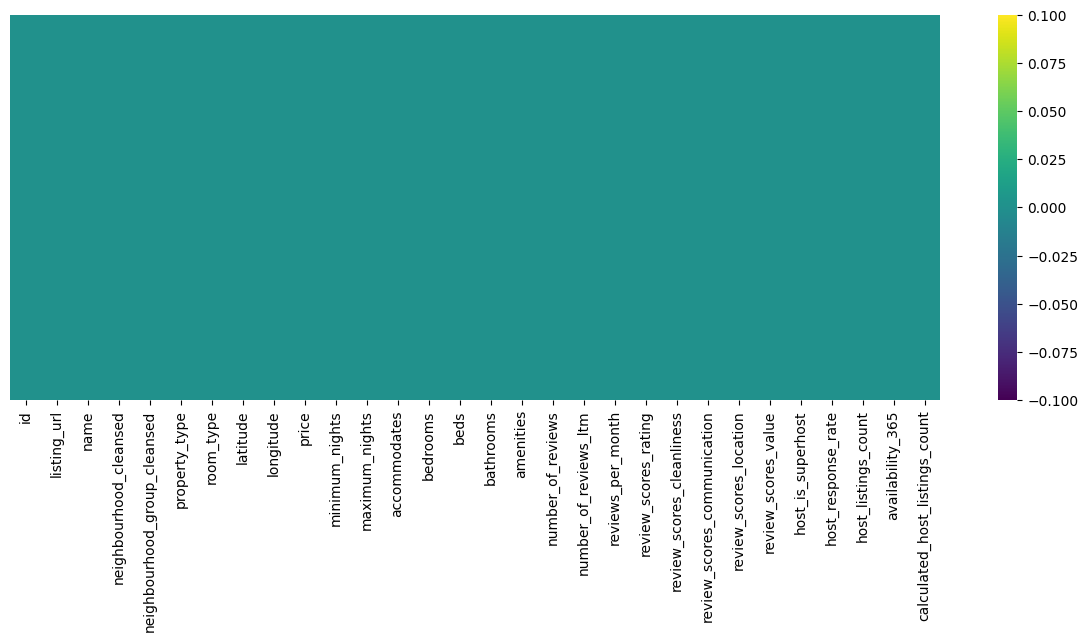

In [44]:
# Comprobamos con mapa de calor que se ha llevado correctamente el KNN
plt.figure(figsize=(15, 5))
sns.heatmap(df_listings.isnull(), yticklabels=False, cbar=True, cmap="viridis")

Podemos ver que ya no tenemos valores nulos en ninguno de los dataframe

### **GUARDAMOS DATAFRAMES LIMPIOS**
Ahora que tenemos los dataset limpios, vamos a guardarlos en su CSV para poder analizar los outliers en el cuarderno 2

In [45]:
df_calendar.isnull().sum()

listing_id        0
date              0
available         0
price             0
minimum_nights    0
maximum_nights    0
dtype: int64

### Hemos decido no guardar el dataframe df_reviews y solo utilizarlo sin arreglar los outliers ni valores nulos porque ocupa mucho espacio y no es viable subirlo a github ni subir la presentación a streamlit.

# **ANALISIS OUTLIERS DATAFRAMES**

# <span style="color:red"><b>**ANALISIS OUTLIERS**</b></span>
Disponemos de los siguientes dataframe:
- df_calendar
- df_listings

### **DF_CALENDAR**

In [46]:
df_calendar.head()

,listing_id,date,available,price,minimum_nights,maximum_nights
0,97529,2024-03-20,f,47.00,120,1125
1,360863,2024-03-20,f,50.00,31,150
2,360863,2024-03-21,f,50.00,31,150
3,360863,2024-03-22,f,50.00,31,150
4,360863,2024-03-23,f,50.00,31,150


In [47]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6759363 entries, 0 to 6759362
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           float64
 4   minimum_nights  int64  
 5   maximum_nights  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 309.4+ MB


In [48]:
# Vemos los datos estadísticas de las variables numéricas de calendar
df_calendar.describe()

,listing_id,price,minimum_nights,maximum_nights
count,6759363.00,6759363.00,6759363.00,6759363.00
mean,381118365036741824.00,237.18,17.11,62264.46
std,444672572982365248.00,1931.88,39.95,11504599.86
min,17475.00,9.00,1.00,1.00
25%,23317712.00,50.00,2.00,330.00
50%,50219794.00,99.00,4.00,365.00
75%,859905687612812544.00,185.00,31.00,1125.00
max,1115690065090507776.00,231858.00,2705.00,2147483647.00


Viendo los datos podemos ver como

In [49]:
# Arreglar outliers
def arreglar_outliers_simple(df):
    # Creamos un nuevo DataFrame para almacenar los valores tratados
    df_cleaned = df.copy()

    # Iteramos sobre cada columna del DataFrame
    for col in df_cleaned.columns:
        # Calculamos los percentiles 25 y 75 (Q1 y Q3) -- ¿recordáis lo que son en un boxplot?
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)

        # Calculamos el rango intercuartílico (IQR)
        IQR = Q3 - Q1

        # Calculamos los límites del intervalo
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        # Reemplazamos los valores atípicos por los límites del  (el upper si está por encima, el lower si está por debajo)
        df_cleaned[col] = df_cleaned[col].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))

    return df_cleaned

In [50]:
df_calendar['price'] = arreglar_outliers_simple(df_calendar[['price']])['price']
df_calendar['minimum_nights'] = arreglar_outliers_simple(df_calendar[['minimum_nights']])['minimum_nights']
df_calendar['maximum_nights'] = arreglar_outliers_simple(df_calendar[['maximum_nights']])['maximum_nights']

In [51]:
df_calendar.describe().T

,count,mean,std,min,25%,50%,75%,max
listing_id,6759363.00,381118365036741824.00,444672572982365248.00,17475.00,23317712.00,50219794.00,859905687612812544.00,1115690065090507776.00
price,6759363.00,136.98,112.88,9.00,50.00,99.00,185.00,387.50
minimum_nights,6759363.00,15.09,16.60,1.00,2.00,4.00,31.00,74.50
maximum_nights,6759363.00,629.26,450.68,1.00,330.00,365.00,1125.00,2317.50


## **DF_LISTINGS**

In [52]:
df_listings.head()

,id,listing_url,name,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,price,minimum_nights,maximum_nights,accommodates,bedrooms,beds,bathrooms,amenities,number_of_reviews,number_of_reviews_ltm,reviews_per_month,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,host_is_superhost,host_response_rate,host_listings_count,availability_365,calculated_host_listings_count
0,360863.00,https://www.airbnb.com/rooms/360863,SPECIAL OFFER @ COSY AND CHARMING,la Barceloneta,Ciutat Vella,Private room in rental unit,Private room,41.38,2.20,173.00,31.00,150.00,2.00,2.18,2.73,1.14,"[""Cleaning available during stay"", ""Baking she...",32.00,0.00,0.22,4.73,4.84,4.94,4.71,4.74,t,6%,2.00,0.00,2.00
1,17475.00,https://www.airbnb.com/rooms/17475,Attic Sagrada Familia,la Dreta de l'Eixample,Eixample,Entire rental unit,Entire home/apt,41.40,2.17,165.00,3.00,90.00,3.00,1.00,1.00,1.00,"[""Microwave"", ""Outdoor dining area"", ""Private ...",29.00,12.00,0.17,4.48,4.23,4.73,4.82,4.50,f,100%,2.00,7.00,1.00
2,18674.00,https://www.airbnb.com/rooms/18674,Huge flat for 8 people close to Sagrada Familia,la Sagrada Família,Eixample,Entire rental unit,Entire home/apt,41.41,2.17,210.00,1.00,1125.00,8.00,3.00,6.00,2.00,"[""Paid parking on premises"", ""Private patio or...",40.00,6.00,0.30,4.33,4.62,4.67,4.77,4.28,f,97%,44.00,252.00,28.00
3,97529.00,https://www.airbnb.com/rooms/97529,Furnished one bedroom apartment with bathroom,el Camp d'en Grassot i Gràcia Nova,Gràcia,Entire rental unit,Entire home/apt,41.41,2.17,170.00,120.00,1125.00,2.00,1.00,4.27,1.27,"[""Microwave"", ""Paid parking off premises"", ""Pr...",67.00,0.00,0.45,4.74,4.86,4.91,4.45,4.71,f,20%,1.00,0.00,1.00
4,110041.00,https://www.airbnb.com/rooms/110041,002. Alió 2 Apartment,el Camp d'en Grassot i Gràcia Nova,Gràcia,Entire rental unit,Entire home/apt,41.40,2.17,94.00,1.00,1125.00,4.00,1.00,2.00,1.00,"[""Microwave"", ""Iron"", ""Dedicated workspace"", ""...",54.00,18.00,0.38,4.17,4.24,4.41,4.65,4.11,f,100%,114.00,226.00,95.00


In [53]:
df_listings.describe().T

,count,mean,std,min,25%,50%,75%,max
id,18519.00,381114305448584192.00,444683917798170368.00,17475.00,23318863.50,50219794.00,859860715961919232.00,1115690065090507776.00
latitude,18519.00,41.39,0.01,41.35,41.38,41.39,41.40,41.46
longitude,18519.00,2.17,0.02,2.09,2.16,2.17,2.18,2.23
price,18519.00,147.29,213.46,10.00,69.00,124.00,178.00,11999.00
minimum_nights,18519.00,15.50,32.85,1.00,1.00,3.00,31.00,1124.00
maximum_nights,18519.00,554.09,433.13,1.00,300.00,365.00,1125.00,3000.00
accommodates,18519.00,3.36,2.15,1.00,2.00,3.00,4.00,16.00
bedrooms,18519.00,1.82,1.13,0.00,1.00,1.82,2.00,18.00
beds,18519.00,2.47,1.72,0.00,1.00,2.00,3.00,30.00
bathrooms,18519.00,1.40,0.65,0.00,1.00,1.00,1.86,10.00


In [54]:
# Para poder abrir los archivos con la url
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Cargamos el dataset de listing pero en formato gz, tambien el data de review y el data de listing pero solo CSV
df_listings1 = pd.read_csv('https://data.insideairbnb.com/spain/catalonia/barcelona/2024-03-20/data/listings.csv.gz')

In [55]:
# Convertimos columna 'price' de tipo objeto a tipo numérico flotante.
df_listings1['price'] = df_listings1['price'].str.replace('[^\d.]', '', regex=True).astype(float)

##### GRAFICAMOS VALORES ATIPICOS PARA PRESENTACION DE STREAMLIT

In [56]:
# Crear un diagrama de caja y bigotes con Plotly
fig = px.box(df_listings1, y='price', template='plotly', title='Diagrama de caja y bigotes de price', height=600)

# Guardar el gráfico en un archivo HTML
#pio.write_html(fig, file='outliers_price.html', auto_open=True)

# Mostrar el gráfico
fig.show()

In [57]:
# Crear un diagrama de caja y bigotes con Plotly
fig = px.box(df_listings1, y='maximum_nights', template='plotly', title='Diagrama de caja y bigotes de maximum_nights',height=600)

# Guardar el gráfico en un archivo HTML
#pio.write_html(fig, file='outliers_nights.html', auto_open=True)

# Mostrar el gráfico
fig.show()

In [58]:
# Arreglar outliers
def arreglar_outliers_simple(df):
    # Creamos un nuevo DataFrame para almacenar los valores tratados
    df_cleaned = df.copy()

    # Iteramos sobre cada columna del DataFrame
    for col in df_cleaned.columns:
        # Calculamos los percentiles 25 y 75 (Q1 y Q3) -- ¿recordáis lo que son en un boxplot?
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)

        # Calculamos el rango intercuartílico (IQR)
        IQR = Q3 - Q1

        # Calculamos los límites del intervalo
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        # Reemplazamos los valores atípicos por los límites del  (el upper si está por encima, el lower si está por debajo)
        df_cleaned[col] = df_cleaned[col].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))

    return df_cleaned

In [59]:
columns_to_fix = ['price', 'minimum_nights', 'maximum_nights', 'accommodates', 'bedrooms', 'beds', 'number_of_reviews', 'number_of_reviews_ltm', 'reviews_per_month', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'host_listings_count','availability_365', 'calculated_host_listings_count','bathrooms']

for column in columns_to_fix:
    df_listings[column] = arreglar_outliers_simple(df_listings[[column]])[column]

In [60]:
df_listings.describe().T

,count,mean,std,min,25%,50%,75%,max
id,18519.00,381114305448584192.00,444683917798170368.00,17475.00,23318863.50,50219794.00,859860715961919232.00,1115690065090507776.00
latitude,18519.00,41.39,0.01,41.35,41.38,41.39,41.40,41.46
longitude,18519.00,2.17,0.02,2.09,2.16,2.17,2.18,2.23
price,18519.00,134.23,81.36,10.00,69.00,124.00,178.00,341.50
minimum_nights,18519.00,14.10,16.06,1.00,1.00,3.00,31.00,76.00
maximum_nights,18519.00,554.03,432.79,1.00,300.00,365.00,1125.00,2362.50
accommodates,18519.00,3.24,1.81,1.00,2.00,3.00,4.00,7.00
bedrooms,18519.00,1.74,0.88,0.00,1.00,1.82,2.00,3.50
beds,18519.00,2.40,1.43,0.00,1.00,2.00,3.00,6.00
bathrooms,18519.00,1.38,0.54,0.00,1.00,1.00,1.86,3.16


Ya tenemos todos los dataframes arreglados tanto de valores nulos como de valores atipicos o outliers. Ahora vamos a valorar si juntarlos o no.

# **VALORAR SI JUNTAR DATAFRAME**
En este apartamos vamos a ver que columnas vamos a tener en cuenta para poder unir los cuatro dataframes en una sola hoja.

#### DF_CALENDAR

In [61]:
df_calendar.head()

,listing_id,date,available,price,minimum_nights,maximum_nights
0,97529,2024-03-20,f,47.00,74.50,1125.00
1,360863,2024-03-20,f,50.00,31.00,150.00
2,360863,2024-03-21,f,50.00,31.00,150.00
3,360863,2024-03-22,f,50.00,31.00,150.00
4,360863,2024-03-23,f,50.00,31.00,150.00


In [62]:
df_calendar.columns

Index(['listing_id', 'date', 'available', 'price', 'minimum_nights',
       'maximum_nights'],
      dtype='object')

In [63]:
# Comprobamos que este todo bien
df_calendar.head()

,listing_id,date,available,price,minimum_nights,maximum_nights
0,97529,2024-03-20,f,47.00,74.50,1125.00
1,360863,2024-03-20,f,50.00,31.00,150.00
2,360863,2024-03-21,f,50.00,31.00,150.00
3,360863,2024-03-22,f,50.00,31.00,150.00
4,360863,2024-03-23,f,50.00,31.00,150.00


Ya tenemos el dataframe sin las columnas que no vamos a necesitar para nuestro analisis.

#### DF_LISTINGS

In [64]:
df_listings.head()

,id,listing_url,name,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,price,minimum_nights,maximum_nights,accommodates,bedrooms,beds,bathrooms,amenities,number_of_reviews,number_of_reviews_ltm,reviews_per_month,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,host_is_superhost,host_response_rate,host_listings_count,availability_365,calculated_host_listings_count
0,360863.00,https://www.airbnb.com/rooms/360863,SPECIAL OFFER @ COSY AND CHARMING,la Barceloneta,Ciutat Vella,Private room in rental unit,Private room,41.38,2.20,173.00,31.00,150.00,2.00,2.18,2.73,1.14,"[""Cleaning available during stay"", ""Baking she...",32.00,0.00,0.22,4.73,4.84,4.94,4.71,4.74,t,6%,2.00,0.00,2.00
1,17475.00,https://www.airbnb.com/rooms/17475,Attic Sagrada Familia,la Dreta de l'Eixample,Eixample,Entire rental unit,Entire home/apt,41.40,2.17,165.00,3.00,90.00,3.00,1.00,1.00,1.00,"[""Microwave"", ""Outdoor dining area"", ""Private ...",29.00,12.00,0.17,4.48,4.23,4.73,4.82,4.50,f,100%,2.00,7.00,1.00
2,18674.00,https://www.airbnb.com/rooms/18674,Huge flat for 8 people close to Sagrada Familia,la Sagrada Família,Eixample,Entire rental unit,Entire home/apt,41.41,2.17,210.00,1.00,1125.00,7.00,3.00,6.00,2.00,"[""Paid parking on premises"", ""Private patio or...",40.00,6.00,0.30,4.33,4.62,4.67,4.77,4.28,f,97%,44.00,252.00,28.00
3,97529.00,https://www.airbnb.com/rooms/97529,Furnished one bedroom apartment with bathroom,el Camp d'en Grassot i Gràcia Nova,Gràcia,Entire rental unit,Entire home/apt,41.41,2.17,170.00,76.00,1125.00,2.00,1.00,4.27,1.27,"[""Microwave"", ""Paid parking off premises"", ""Pr...",67.00,0.00,0.45,4.74,4.86,4.91,4.45,4.71,f,20%,1.00,0.00,1.00
4,110041.00,https://www.airbnb.com/rooms/110041,002. Alió 2 Apartment,el Camp d'en Grassot i Gràcia Nova,Gràcia,Entire rental unit,Entire home/apt,41.40,2.17,94.00,1.00,1125.00,4.00,1.00,2.00,1.00,"[""Microwave"", ""Iron"", ""Dedicated workspace"", ""...",54.00,18.00,0.38,4.17,4.24,4.41,4.65,4.11,f,100%,97.00,226.00,78.50


### Graficos para presentacion - sin outliers

In [65]:
# Crear un diagrama de caja y bigotes con Plotly
fig = px.box(df_listings, y='price', template='plotly', title='Diagrama de caja y bigotes de price',height=600)

# Guardar el gráfico en un archivo HTML
# pio.write_html(fig, file='3_sinoutliers_price.html', auto_open=True)

# Mostrar el gráfico
fig.show()

In [66]:
# Crear un diagrama de caja y bigotes con Plotly
fig = px.box(df_listings, y='minimum_nights', template='plotly', title='Diagrama de caja y bigotes de price',height=600)

# Guardar el gráfico en un archivo HTML
#pio.write_html(fig, file='4_sinoutliers_nights.html', auto_open=True)

# Mostrar el gráfico
fig.show()

In [67]:
df_listings.columns

Index(['id', 'listing_url', 'name', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'latitude', 'longitude', 'price', 'minimum_nights', 'maximum_nights',
       'accommodates', 'bedrooms', 'beds', 'bathrooms', 'amenities',
       'number_of_reviews', 'number_of_reviews_ltm', 'reviews_per_month',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'host_is_superhost', 'host_response_rate',
       'host_listings_count', 'availability_365',
       'calculated_host_listings_count'],
      dtype='object')

#### como bien hemos comentado en el notebook anterior, no vamos arreglar los valores de reviews y solo lo vamos a utlizar en la presentación en la sección de analisis de sentimiento

# **ANALISIS DESCRIPTIVO**

In [68]:
# Importamos librerias necesarias para poder trabajar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
import feather 
import plotly.io as pio

In [69]:
# Mostrar todas las columnas y filas de nuestro dataframes
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Configuración del formato de numeros
pd.options.display.float_format = '{:.2f}'.format

In [70]:
df_listings = pd.read_feather (r'/Users/juliobrionesmorales/Documents/GitHub/Airbnb_Barcelona/data/3. data_sin_outliers/df_listings.feather')

In [71]:
df_listings.columns

Index(['id', 'listing_url', 'name', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'latitude', 'longitude', 'price', 'minimum_nights', 'maximum_nights',
       'accommodates', 'bedrooms', 'beds', 'bathrooms', 'amenities',
       'number_of_reviews', 'number_of_reviews_ltm', 'reviews_per_month',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'host_is_superhost', 'host_response_rate',
       'host_listings_count', 'availability_365',
       'calculated_host_listings_count'],
      dtype='object')

In [72]:
pisos = pd.DataFrame(df_listings['neighbourhood_cleansed'].unique(), columns=['neighbourhood_cleansed'])
pisos.head()

,neighbourhood_cleansed
0,la Barceloneta
1,la Dreta de l'Eixample
2,la Sagrada Família
3,el Camp d'en Grassot i Gràcia Nova
4,el Raval


Para las muestra de graficos descriptivos no utilizaremos df_reviews porque es necesario mostrar nada graficamente. Nos servirá para poder analizar el sentimiento de las palabras más adelante durante el proyecto.

In [73]:
df_listings.head()

,id,listing_url,name,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,price,minimum_nights,maximum_nights,accommodates,bedrooms,beds,bathrooms,amenities,number_of_reviews,number_of_reviews_ltm,reviews_per_month,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,host_is_superhost,host_response_rate,host_listings_count,availability_365,calculated_host_listings_count
0,360863.00,https://www.airbnb.com/rooms/360863,SPECIAL OFFER @ COSY AND CHARMING,la Barceloneta,Ciutat Vella,Private room in rental unit,Private room,41.38,2.20,173.00,31.00,150.00,2.00,2.18,2.73,1.14,"[""Cleaning available during stay"", ""Baking she...",32.00,0.00,0.22,4.73,4.84,4.94,4.71,4.74,t,6%,2.00,0.00,2.00
1,17475.00,https://www.airbnb.com/rooms/17475,Attic Sagrada Familia,la Dreta de l'Eixample,Eixample,Entire rental unit,Entire home/apt,41.40,2.17,165.00,3.00,90.00,3.00,1.00,1.00,1.00,"[""Microwave"", ""Outdoor dining area"", ""Private ...",29.00,12.00,0.17,4.48,4.23,4.73,4.82,4.50,f,100%,2.00,7.00,1.00
2,18674.00,https://www.airbnb.com/rooms/18674,Huge flat for 8 people close to Sagrada Familia,la Sagrada Família,Eixample,Entire rental unit,Entire home/apt,41.41,2.17,210.00,1.00,1125.00,7.00,3.00,6.00,2.00,"[""Paid parking on premises"", ""Private patio or...",40.00,6.00,0.30,4.33,4.62,4.67,4.77,4.28,f,97%,44.00,252.00,28.00
3,97529.00,https://www.airbnb.com/rooms/97529,Furnished one bedroom apartment with bathroom,el Camp d'en Grassot i Gràcia Nova,Gràcia,Entire rental unit,Entire home/apt,41.41,2.17,170.00,76.00,1125.00,2.00,1.00,4.27,1.27,"[""Microwave"", ""Paid parking off premises"", ""Pr...",67.00,0.00,0.45,4.74,4.86,4.91,4.45,4.71,f,20%,1.00,0.00,1.00
4,110041.00,https://www.airbnb.com/rooms/110041,002. Alió 2 Apartment,el Camp d'en Grassot i Gràcia Nova,Gràcia,Entire rental unit,Entire home/apt,41.40,2.17,94.00,1.00,1125.00,4.00,1.00,2.00,1.00,"[""Microwave"", ""Iron"", ""Dedicated workspace"", ""...",54.00,18.00,0.38,4.17,4.24,4.41,4.65,4.11,f,100%,97.00,226.00,78.50


# GRAFICOS DESCRIPTIVO - DF_LISTINGS

In [74]:
df_listings['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [75]:
df_listings.columns

Index(['id', 'listing_url', 'name', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'latitude', 'longitude', 'price', 'minimum_nights', 'maximum_nights',
       'accommodates', 'bedrooms', 'beds', 'bathrooms', 'amenities',
       'number_of_reviews', 'number_of_reviews_ltm', 'reviews_per_month',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'host_is_superhost', 'host_response_rate',
       'host_listings_count', 'availability_365',
       'calculated_host_listings_count'],
      dtype='object')

In [76]:
fig = px.box(df_listings, x='neighbourhood_group_cleansed', y='price', template='plotly', title='Precio en función del grupo de vecinos',height=700)

# Guardar el gráfico en un archivo HTML
#pio.write_html(fig, file='5_precio_grupovecinos.html', auto_open=True)

fig.show()

In [77]:
df_listings.columns

Index(['id', 'listing_url', 'name', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'latitude', 'longitude', 'price', 'minimum_nights', 'maximum_nights',
       'accommodates', 'bedrooms', 'beds', 'bathrooms', 'amenities',
       'number_of_reviews', 'number_of_reviews_ltm', 'reviews_per_month',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'host_is_superhost', 'host_response_rate',
       'host_listings_count', 'availability_365',
       'calculated_host_listings_count'],
      dtype='object')

In [78]:
# GRAFICAS NUMERO DE CAMAS POR TIPO DE PROPIEDAD

# Para poder graficar las variables vamos a utilizar property_type y beds
grouped_type = df_listings.groupby('room_type')['beds'].sum().reset_index()

# Crear el gráfico de barras
fig = px.bar(grouped_type, x='room_type', y='beds', title='Número de camas por tipo de habitación',height=700)
# Actualizar el layout para quitar los decimales
fig.update_layout(yaxis=dict(tickformat='d'))

# Guardar el gráfico en un archivo HTML
#pio.write_html(fig, file='6_camas_tipohabitacion.html', auto_open=True)

fig.show()

In [79]:
grouped_type

,room_type,beds
0,Entire home/apt,31378.55
1,Hotel room,288.18
2,Private room,12322.36
3,Shared room,457.73


In [80]:
# GRAFICO TIPO DE PROPIEDADES 

# Contamos el numero de cada tipo de propiedad 
property_type_counts = df_listings ['property_type'].value_counts().reset_index()

# Graficar usando un gráfico de barras (bar chart)
fig = px.bar(property_type_counts, x='count', y='property_type', color ='property_type',template='plotly', title='TIPO DE PROPIEDADES DISPONIBLES - MAYO 2024',height=800, width=1200)
fig.show()

In [81]:
property_type_counts.head(5)

,property_type,count
0,Entire rental unit,9681
1,Private room in rental unit,5674
2,Entire serviced apartment,465
3,Room in hotel,402
4,Entire condo,395


In [82]:
df_listings.columns

Index(['id', 'listing_url', 'name', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'latitude', 'longitude', 'price', 'minimum_nights', 'maximum_nights',
       'accommodates', 'bedrooms', 'beds', 'bathrooms', 'amenities',
       'number_of_reviews', 'number_of_reviews_ltm', 'reviews_per_month',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'host_is_superhost', 'host_response_rate',
       'host_listings_count', 'availability_365',
       'calculated_host_listings_count'],
      dtype='object')

In [83]:
# Agrupamos por mínimo de noches y tipo de habitación, y calculamos el precio promedio
grouped_data = df_listings.groupby(['room_type','minimum_nights'])['price'].mean().reset_index()

# Configurar el formato del eje y para mostrar los precios reales
fig = make_subplots(rows=2, cols=2, subplot_titles=grouped_data['room_type'].unique())

for i, room_type in enumerate(grouped_data['room_type'].unique(), 1):
    filtered_data = grouped_data[grouped_data['room_type'] == room_type]
    fig.add_trace(go.Scatter(x=filtered_data['minimum_nights'], y=filtered_data['price'], mode='lines', name=room_type),
                  row=(i + 1) // 2, col=(i % 2) + 1)

fig.update_layout(title_text='Evolución de precios por tipo de habitación', showlegend=False,height=700)
fig.update_yaxes(title_text='Precio promedio', tickformat='$,.2f')  # Formato de dólares sin escalar

# Guardar el gráfico en un archivo HTML
#pio.write_html(fig, file='7_evolucion_preciohabitacion.html', auto_open=True)

fig.show()

In [84]:
# Agrupamos por mínimo de noches y tipo de habitación, y calculamos el precio promedio
grouped_data = df_listings.groupby(['minimum_nights','room_type'])['price'].mean().reset_index()

# Configurar el formato del eje y para mostrar los precios reales
fig = make_subplots(rows=2, cols=2, subplot_titles=grouped_data['room_type'].unique())

for i, room_type in enumerate(grouped_data['room_type'].unique(), 1):
    filtered_data = grouped_data[grouped_data['room_type'] == room_type]
    fig.add_trace(go.Scatter(x=filtered_data['minimum_nights'], y=filtered_data['price'], mode='lines', name=room_type),
                  row=(i + 1) // 2, col=(i % 2) + 1)

fig.update_layout(title_text='Evolución de precios por tipo de habitación', showlegend=False)
fig.update_yaxes(title_text='Precio promedio', tickformat='€,.2f')  
fig.update_xaxes(title_text='Mínimo de noches', tickformat='format_xaxis')
fig.show()

In [85]:
# GRAFICIO ZONAS VECINALES DISPONIBLES

# Contamos los grupos de vecinos con zonas disponibles 
neighbourhood_group_counts = df_listings['neighbourhood_group_cleansed'].value_counts().reset_index()
neighbourhood_group_counts.columns = ['neighbourhood_group', 'count']

# Graficar usando un gráfico de barras (bar chart)
fig = px.bar(neighbourhood_group_counts, x='count', y='neighbourhood_group', color ='neighbourhood_group',template='plotly', title='ZONAS VECINALES', width=900)
fig.show()

In [86]:
# GRAFICO ZONAS VECINALES - TIPO DE HABITACIÓN


# Contamos los grupos de vecinos con zonas disponibles 
neighbourhood_group_counts = df_listings.groupby(['neighbourhood_group_cleansed', 'room_type']).size().reset_index(name='count')


fig = px.bar(neighbourhood_group_counts, x='count', y='neighbourhood_group_cleansed', color='room_type',
             title='ZONAS VECINALES',
             width=900, height=600, template='plotly')

fig.show()

In [87]:
# GRAFICO ZONAS VECINALES - TIPO DE PROPIEDAD


# Contamos los grupos de vecinos con zonas disponibles 
neighbourhood_group_counts = df_listings.groupby(['neighbourhood_group_cleansed', 'property_type']).size().reset_index(name='count')


fig = px.bar(neighbourhood_group_counts, x='count', y='neighbourhood_group_cleansed', color='property_type',
             title='ZONAS VECINALES - TIPO DE PROPIEDAD',
             width=900, height=600, template='plotly')

fig.show()


In [88]:
# GRAFICO MINIMUM_NIGHTS EN FUNCIÓN DE TIPO DE PROPIEDAD

# Contamos los grupos de vecinos con zonas disponibles 
minimum_nights_counts = df_listings.groupby(['minimum_nights', 'property_type']).size().reset_index(name='count')


fig = px.bar(minimum_nights_counts, y='property_type', x='minimum_nights', color='property_type',
             title='NOCHES MINIMAS POR TIPO DE PROPIEDAD',
             width=1000, height=800, template='plotly')

fig.show()

In [89]:
# GRAFICO MINIMUM_NIGHTS EN FUNCIÓN DE TIPO DE HABITACION

# Contamos los grupos de vecinos con zonas disponibles 
minimum_nights_counts = df_listings.groupby(['minimum_nights', 'room_type', 'property_type']).size().reset_index(name='count')


fig = px.bar(minimum_nights_counts, color='room_type', x='minimum_nights', y ='property_type',
             title='NOCHES MINIMAS POR TIPO DE HABITACIÓN',
             width=1000, height=800, template='plotly')

fig.show()

In [90]:
# GRAFICO MAXIMUM_NIGHTS EN FUNCIÓN DE TIPO DE PROPIEDAD

# Contamos los grupos de vecinos con zonas disponibles 
maximum_nights_counts = df_listings.groupby(['maximum_nights', 'property_type']).size().reset_index(name='count')


fig = px.bar(maximum_nights_counts, y='property_type', x='maximum_nights', color='property_type',
             title='NOCHES MAXIMAS POR TIPO DE PROPIEDAD',
             width=1000, height=800, template='plotly')

fig.show()

In [91]:
# GRAFICO MAXIMUM_NIGHTS EN FUNCIÓN DE TIPO DE HABITACION

# Contamos los grupos de vecinos con zonas disponibles 
maximum_nights_counts = df_listings.groupby(['maximum_nights', 'room_type', 'property_type']).size().reset_index(name='count').round()


fig = px.bar(maximum_nights_counts, color='room_type', x='maximum_nights', y ='property_type',
             title='NOCHES MAXIMAS POR TIPO DE HABITACIÓN',
             width=1000, height=800, template='plotly')

fig.show()

In [92]:
df_listings.columns

Index(['id', 'listing_url', 'name', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'latitude', 'longitude', 'price', 'minimum_nights', 'maximum_nights',
       'accommodates', 'bedrooms', 'beds', 'bathrooms', 'amenities',
       'number_of_reviews', 'number_of_reviews_ltm', 'reviews_per_month',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'host_is_superhost', 'host_response_rate',
       'host_listings_count', 'availability_365',
       'calculated_host_listings_count'],
      dtype='object')

In [93]:
# GRAFICO DEL NUMERO DE ACOCOMODATES

# Agrupar por 'property_type' y 'accommodates' y contar las ocurrencias
accommodates_counts = df_listings.groupby(['property_type', 'accommodates']).size().reset_index(name='count')

# Crear un gráfico de barras
fig = px.bar(accommodates_counts, y='property_type', x='count', color='accommodates',
             title='Número de Acomodaciones por Tipo de Propiedad',
             labels={'property_type': 'Tipo de Propiedad', 'count': 'Cantidad'},
             template='plotly', height=1200)

fig.show()

In [94]:
# GRAFICO DEL NUMERO DE BEDRROMS

bedrooms_counts = df_listings['bedrooms'].value_counts().reset_index().round()
bedrooms_counts.columns = ['bedrooms', 'count']


# Graficar usando un gráfico de barras (bar chart)
fig = px.bar(bedrooms_counts, y='count', x='bedrooms', color ='bedrooms',template='plotly', title='NUMERO DE BEDROOMS', width=900)
fig.show()

In [95]:
# GRAFICO DEL NUMERO DE BEDS

beds_counts = df_listings['beds'].value_counts().reset_index()
beds_counts.columns = ['beds', 'count']


# Graficar usando un gráfico de barras (bar chart)
fig = px.bar(beds_counts, y='count', x='beds', color ='beds',template='plotly', title='NUMERO DE BEDS', width=900)
fig.show()

In [96]:
df_listings.columns

Index(['id', 'listing_url', 'name', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'latitude', 'longitude', 'price', 'minimum_nights', 'maximum_nights',
       'accommodates', 'bedrooms', 'beds', 'bathrooms', 'amenities',
       'number_of_reviews', 'number_of_reviews_ltm', 'reviews_per_month',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'host_is_superhost', 'host_response_rate',
       'host_listings_count', 'availability_365',
       'calculated_host_listings_count'],
      dtype='object')

In [97]:
# GRAFICA DE PORCENTAJE - GRUPO DE VECINOS

# Calcular la cantidad de listados por 'neighbourhood_group_cleansed'
neighbourhood_counts = df_listings['neighbourhood_group_cleansed'].value_counts().reset_index()
neighbourhood_counts.columns = ['neighbourhood_group_cleansed', 'count']

# Crear un gráfico circular
fig = px.pie(neighbourhood_counts, values='count', names='neighbourhood_group_cleansed', 
             title='Distribución de Listados por Grupo de Vecindarios',
             labels={'neighbourhood_group_cleansed': 'Grupo de Vecindarios', 'count': 'Cantidad'},
             template='plotly',height=700)

# Guardar el gráfico en un archivo HTML
#pio.write_html(fig, file='8_grupos_vecinos.html', auto_open=True)

fig.show()

# **ANALISIS DE PRATRONES**
Para poder identificar los patrones, vamos a realizar un dataframes con el top50 de vivientas ocupadas, y el top50 de las peores viviendas en cuanto a alquiler. 

In [98]:
# Importamos las librerias necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
import zipfile
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import f_oneway
import folium
from folium.plugins import FastMarkerCluster
import scipy.stats as stats
import plotly.io as pio
import feather

In [99]:
# Mostrar todas las columnas y filas de nuestro dataframes
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Configuración del formato de numeros
pd.options.display.float_format = '{:.2f}'.format

In [100]:
# Mostramos el head de listings
df_listings.head()

,id,listing_url,name,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,price,minimum_nights,maximum_nights,accommodates,bedrooms,beds,bathrooms,amenities,number_of_reviews,number_of_reviews_ltm,reviews_per_month,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,host_is_superhost,host_response_rate,host_listings_count,availability_365,calculated_host_listings_count
0,360863.00,https://www.airbnb.com/rooms/360863,SPECIAL OFFER @ COSY AND CHARMING,la Barceloneta,Ciutat Vella,Private room in rental unit,Private room,41.38,2.20,173.00,31.00,150.00,2.00,2.18,2.73,1.14,"[""Cleaning available during stay"", ""Baking she...",32.00,0.00,0.22,4.73,4.84,4.94,4.71,4.74,t,6%,2.00,0.00,2.00
1,17475.00,https://www.airbnb.com/rooms/17475,Attic Sagrada Familia,la Dreta de l'Eixample,Eixample,Entire rental unit,Entire home/apt,41.40,2.17,165.00,3.00,90.00,3.00,1.00,1.00,1.00,"[""Microwave"", ""Outdoor dining area"", ""Private ...",29.00,12.00,0.17,4.48,4.23,4.73,4.82,4.50,f,100%,2.00,7.00,1.00
2,18674.00,https://www.airbnb.com/rooms/18674,Huge flat for 8 people close to Sagrada Familia,la Sagrada Família,Eixample,Entire rental unit,Entire home/apt,41.41,2.17,210.00,1.00,1125.00,7.00,3.00,6.00,2.00,"[""Paid parking on premises"", ""Private patio or...",40.00,6.00,0.30,4.33,4.62,4.67,4.77,4.28,f,97%,44.00,252.00,28.00
3,97529.00,https://www.airbnb.com/rooms/97529,Furnished one bedroom apartment with bathroom,el Camp d'en Grassot i Gràcia Nova,Gràcia,Entire rental unit,Entire home/apt,41.41,2.17,170.00,76.00,1125.00,2.00,1.00,4.27,1.27,"[""Microwave"", ""Paid parking off premises"", ""Pr...",67.00,0.00,0.45,4.74,4.86,4.91,4.45,4.71,f,20%,1.00,0.00,1.00
4,110041.00,https://www.airbnb.com/rooms/110041,002. Alió 2 Apartment,el Camp d'en Grassot i Gràcia Nova,Gràcia,Entire rental unit,Entire home/apt,41.40,2.17,94.00,1.00,1125.00,4.00,1.00,2.00,1.00,"[""Microwave"", ""Iron"", ""Dedicated workspace"", ""...",54.00,18.00,0.38,4.17,4.24,4.41,4.65,4.11,f,100%,97.00,226.00,78.50


In [101]:
df_listings_copy = df_listings.copy()

In [102]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18519 entries, 0 to 18518
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18519 non-null  float64
 1   listing_url                     18519 non-null  object 
 2   name                            18519 non-null  object 
 3   neighbourhood_cleansed          18519 non-null  object 
 4   neighbourhood_group_cleansed    18519 non-null  object 
 5   property_type                   18519 non-null  object 
 6   room_type                       18519 non-null  object 
 7   latitude                        18519 non-null  float64
 8   longitude                       18519 non-null  float64
 9   price                           18519 non-null  float64
 10  minimum_nights                  18519 non-null  float64
 11  maximum_nights                  18519 non-null  float64
 12  accommodates                    

In [103]:
df_listings.columns

Index(['id', 'listing_url', 'name', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'latitude', 'longitude', 'price', 'minimum_nights', 'maximum_nights',
       'accommodates', 'bedrooms', 'beds', 'bathrooms', 'amenities',
       'number_of_reviews', 'number_of_reviews_ltm', 'reviews_per_month',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'host_is_superhost', 'host_response_rate',
       'host_listings_count', 'availability_365',
       'calculated_host_listings_count'],
      dtype='object')

In [104]:
df_listings['availability_365'].unique()

array([  0.,   7., 252., 226., 210., 198., 166., 204., 250., 277., 248.,
        47., 208., 238., 242., 339.,  93., 365., 224., 282., 326., 191.,
       291., 316.,  88., 148., 114.,  33.,  58., 165., 201., 185., 293.,
       327., 335., 309., 364., 228.,  83., 305., 125., 116., 167., 267.,
       153., 197., 296., 163.,  54., 123., 363.,  78., 189., 278.,  12.,
         1., 348., 157., 179., 258., 362.,  76., 229., 181., 227., 184.,
       353.,  57.,  91., 355., 262., 140., 294., 303.,  84., 283., 221.,
       297., 243., 245., 317., 255., 194.,  38., 193.,  11., 236.,  99.,
       334.,  45., 269.,  30., 112., 110., 129.,  52., 320., 338., 247.,
       275., 124., 101., 332., 130.,  75.,  60., 300., 103., 285.,  59.,
       288.,  79., 233., 235.,  87., 115., 276.,  82., 214.,   4., 292.,
       284., 211.,  77., 187., 241., 270., 351.,  25., 151., 230., 202.,
         5.,   3., 310., 225., 168., 280., 257., 144., 265., 220., 219.,
       212., 289., 260.,  23., 178.,  53., 100., 26

## CORRELACION DE VARIABLES
En este apartado vamos a determinar las variables que tienen más correlación con 'availability_365' con respecto a las otras variables para poder determinar luego el top50 de propiedades. También los vamos hacer con 'price'.

In [105]:
# CORRELACION PRICE

# Seleccionar solo las características numéricas
numeric_features = df_listings.select_dtypes(include=['float64'])

# Calcular la correlación con respecto a "price"
correlation_with_price = numeric_features.corrwith(df_listings['price'])

# Ordenar las correlaciones en orden descendente
sorted_correlation_with_price = correlation_with_price.abs().sort_values(ascending=False)

# Imprimir las correlaciones con respecto a "price" ordenadas de mayor a menor
print(sorted_correlation_with_price)

price                            1.00
beds                             0.57
accommodates                     0.55
bedrooms                         0.46
minimum_nights                   0.40
bathrooms                        0.28
number_of_reviews                0.25
id                               0.23
number_of_reviews_ltm            0.22
maximum_nights                   0.11
review_scores_cleanliness        0.10
review_scores_location           0.10
review_scores_value              0.08
review_scores_communication      0.07
review_scores_rating             0.07
availability_365                 0.05
reviews_per_month                0.04
longitude                        0.03
calculated_host_listings_count   0.01
host_listings_count              0.01
latitude                         0.01
dtype: float64


In [106]:
# CORRELACION AVAILABILITY_365  

# Seleccionar solo las características numéricas
numeric_features = df_listings.select_dtypes(include=['float64'])

# Calcular la correlación con respecto a "price"
correlation_with_price = numeric_features.corrwith(df_listings['availability_365'])

# Ordenar las correlaciones en orden descendente
sorted_correlation_with_price = correlation_with_price.abs().sort_values(ascending=False)

# Imprimir las correlaciones con respecto a "price" ordenadas de mayor a menor
print(sorted_correlation_with_price)


availability_365                 1.00
calculated_host_listings_count   0.27
host_listings_count              0.27
minimum_nights                   0.18
review_scores_value              0.18
id                               0.16
review_scores_communication      0.14
accommodates                     0.13
review_scores_rating             0.11
review_scores_cleanliness        0.08
review_scores_location           0.07
price                            0.05
beds                             0.04
longitude                        0.03
maximum_nights                   0.03
number_of_reviews                0.03
bedrooms                         0.02
number_of_reviews_ltm            0.01
latitude                         0.01
bathrooms                        0.01
reviews_per_month                0.00
dtype: float64


## TOP50 VIVIENDAS - MEJORES / PEORES

Para poder hacer las top200 mejores y peores, vamos a tener la correlaciones calculadas antes respecto al precio y respecto a la disponibilidad, para establecerlas en el weight de nuestro top200:

**AVAILABILITY_365**
- availability_365:              1.00
- host_listings_count:           0.27
- minimum_nights:                0.18
- review_scores_value:           0.18
- id:                            0.16
- review_scores_communication:   0.14
- accommodates:                  0.13
- review_scores_rating:          0.11
- review_scores_cleanliness:     0.08
- review_scores_location:        0.07
- price:                         0.05
- beds:                          0.04


**PRICE**
- price:                         1.00
- beds:                          0.57
- accommodates:                  0.55
- bedrooms:                      0.46
- minimum_nights:                0.40
- number_of_reviews:             0.25
- id:                            0.23
- number_of_reviews_ltm:         0.22
- maximum_nights:                0.11
- review_scores_cleanliness:     0.10
- review_scores_location:        0.10
- review_scores_value:           0.08


Ahora para hacer el top50 vamos a tener en cuenta en weights las varibles la correlacionadas. 

In [107]:
# Eliminamos duplicados basados en el ID de la vivienda
df_listings_drop_duplicates = df_listings.drop_duplicates(subset='id') 

# Ponderación de cada característica
weights = {
    'host_listings_count':0.2,
    'beds':0.2,
    'accommodates': 0.2,
    'minimum_nights': 0.1,
    'review_scores_value':0.1,
    'bedrooms': 0.1,
    'review_scores_communication': 0.05,
    'price': 0.05
}


# Nos aseguramos que no hay valores nulos
df_listings_drop_duplicates.fillna(0, inplace=True)

# Normalizar el precio para que esté entre 0 y 1
scaler = MinMaxScaler()
df_listings_drop_duplicates['price_normalized'] = scaler.fit_transform(df_listings_drop_duplicates[['price']])
df_listings_drop_duplicates['price_normalized']= 1-df_listings_drop_duplicates['price_normalized']

# Calculamos el puntaje ponderado
df_listings_drop_duplicates['weighted_score'] = (
    df_listings_drop_duplicates['host_listings_count'] * weights['host_listings_count'] +
    df_listings_drop_duplicates['beds'] * weights['beds'] +
    df_listings_drop_duplicates['accommodates'] * weights['accommodates'] +
    df_listings_drop_duplicates['minimum_nights'] * weights['minimum_nights'] +
    df_listings_drop_duplicates['review_scores_value'] * weights['review_scores_value'] +
    df_listings_drop_duplicates['bedrooms'] * weights['bedrooms'] +
    df_listings_drop_duplicates['review_scores_communication'] * weights['review_scores_communication'] +
    df_listings_drop_duplicates['price_normalized'] * weights['price']
)

# Ordenar por el puntaje ponderado para obtener las 50 mejores
top_200 = df_listings_drop_duplicates.sort_values(by='weighted_score', ascending=False).head(200)

# Mostrar los resultados de las 50 mejores viviendas
print(top_200[['id', 'beds', 'bedrooms', 'price', 'accommodates', 'weighted_score']])

# Ordenar por el puntaje ponderado para obtener las 50 peores
bottom_200 = df_listings_drop_duplicates.sort_values(by='weighted_score', ascending=True).head(200)

# Mostrar los resultados de las 50 peores viviendas
print(bottom_200[['id', 'beds', 'bedrooms', 'price', 'accommodates', 'weighted_score']])

                          id  beds  bedrooms  price  accommodates  \
16063  968720450586425856.00  4.00      3.00 248.00          6.00   
9444             50861575.00  3.00      3.00 122.00          6.00   
9603             51759096.00  3.00      3.00 148.00          6.00   
12395  744806258021033088.00  3.00      3.00 208.00          4.00   
9915             52933728.00  2.82      1.00 159.27          2.00   
7214             39571615.00  1.00      0.00  50.00          2.00   
7198             39548516.00  1.00      0.00  50.00          2.00   
6829             36824913.00  1.00      0.00  50.00          2.00   
10817  604823244440152064.00  3.00      3.00  78.00          6.00   
3134             16475404.00  2.91      3.00 184.82          4.00   
5780             30223189.00  1.00      1.00  81.00          2.00   
8136             42947434.00  6.00      3.50 125.00          6.00   
8139             42947823.00  6.00      3.50 110.00          6.00   
6825             36820320.00  6.00

In [108]:
# Mostramos las 50 mejores
top_200[['id','beds', 'bedrooms', 'price', 'accommodates', 'weighted_score']]

,id,beds,bedrooms,price,accommodates,weighted_score
16063,968720450586425856.00,4.00,3.00,248.00,6.00,29.97
9444,50861575.00,3.00,3.00,122.00,6.00,29.88
9603,51759096.00,3.00,3.00,148.00,6.00,29.77
12395,744806258021033088.00,3.00,3.00,208.00,4.00,29.41
9915,52933728.00,2.82,1.00,159.27,2.00,28.78
7214,39571615.00,1.00,0.00,50.00,2.00,28.39
7198,39548516.00,1.00,0.00,50.00,2.00,28.32
6829,36824913.00,1.00,0.00,50.00,2.00,28.32
10817,604823244440152064.00,3.00,3.00,78.00,6.00,28.15
3134,16475404.00,2.91,3.00,184.82,4.00,27.82


In [109]:
# Mostramos las 50 peores
bottom_200[['id', 'beds', 'bedrooms', 'price', 'accommodates', 'weighted_score']]

,id,beds,bedrooms,price,accommodates,weighted_score
16735,1016449343214723584.00,0.00,1.00,55.00,1.00,1.32
14642,900907375525248128.00,0.00,1.00,60.00,1.00,1.33
5844,31884524.00,0.00,1.00,45.00,1.00,1.34
14457,893890275442034048.00,0.00,1.00,70.00,1.00,1.34
12710,763883578421275520.00,0.00,1.00,65.00,1.00,1.36
13575,842126611333474048.00,0.00,0.00,70.00,1.00,1.36
16863,1023272532720098688.00,0.00,1.00,42.00,1.00,1.36
14858,914559057079444096.00,0.00,0.00,35.00,1.00,1.36
12853,785547170328341376.00,0.00,1.00,30.00,1.00,1.36
17202,1037001392007124736.00,0.00,1.00,43.00,1.00,1.37


In [110]:
# Realizamos un describe para poder analizar cada una de las variables numéricas
top_200.describe().T

,count,mean,std,min,25%,50%,75%,max
id,200.00,612849792337660032.00,425738999219372608.00,290535.00,53077512.00,782064730332971008.00,973853473693172224.00,1108153097338524672.00
latitude,200.00,41.39,0.01,41.37,41.38,41.39,41.40,41.43
longitude,200.00,2.16,0.02,2.12,2.15,2.16,2.17,2.22
price,200.00,144.26,51.27,26.00,113.61,138.00,161.45,341.50
minimum_nights,200.00,33.62,9.38,25.00,31.00,31.00,32.00,76.00
maximum_nights,200.00,515.25,321.25,180.00,330.00,365.00,365.00,1125.00
accommodates,200.00,5.17,1.07,1.00,5.00,5.00,6.00,7.00
bedrooms,200.00,2.90,0.60,0.00,3.00,3.00,3.00,3.50
beds,200.00,3.48,0.99,1.00,3.00,3.00,4.00,6.00
bathrooms,200.00,1.77,0.54,1.00,1.27,2.00,2.00,3.16


In [111]:
bottom_200.describe().T

,count,mean,std,min,25%,50%,75%,max
id,200.00,687503303564211200.00,394883843024895488.00,1604559.00,617907621096975232.00,840273759416531712.00,981892837931718144.00,1115157066470587264.00
latitude,200.00,41.40,0.02,41.37,41.38,41.40,41.41,41.45
longitude,200.00,2.17,0.02,2.09,2.15,2.17,2.18,2.22
price,200.00,72.10,41.80,27.00,45.00,60.00,80.00,264.00
minimum_nights,200.00,1.29,0.52,1.00,1.00,1.00,2.00,4.00
maximum_nights,200.00,408.42,393.37,1.00,31.00,365.00,365.00,1125.00
accommodates,200.00,1.30,0.47,1.00,1.00,1.00,2.00,3.00
bedrooms,200.00,0.95,0.29,0.00,1.00,1.00,1.00,2.00
beds,200.00,0.79,0.45,0.00,1.00,1.00,1.00,1.91
bathrooms,200.00,1.13,0.40,0.00,1.00,1.00,1.00,3.16


## COMPARACION GRAFICAS DE MEJORE Y PEORES PROPIEDADES

In [112]:
# Primero vemos las columnas que podemos analizar del top200
print(top_200.columns)
print('\n')
print(bottom_200.columns)

Index(['id', 'listing_url', 'name', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'latitude', 'longitude', 'price', 'minimum_nights', 'maximum_nights',
       'accommodates', 'bedrooms', 'beds', 'bathrooms', 'amenities',
       'number_of_reviews', 'number_of_reviews_ltm', 'reviews_per_month',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'host_is_superhost', 'host_response_rate',
       'host_listings_count', 'availability_365',
       'calculated_host_listings_count', 'price_normalized', 'weighted_score'],
      dtype='object')


Index(['id', 'listing_url', 'name', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'latitude', 'longitude', 'price', 'minimum_nights', 'maximum_nights',
       'accommodates', 'bedrooms', 'beds', 'bathrooms', 'amenities',
       'number_of_rev

In [113]:
top_200.head()

,id,listing_url,name,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,price,minimum_nights,maximum_nights,accommodates,bedrooms,beds,bathrooms,amenities,number_of_reviews,number_of_reviews_ltm,reviews_per_month,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,host_is_superhost,host_response_rate,host_listings_count,availability_365,calculated_host_listings_count,price_normalized,weighted_score
16063,968720450586425856.00,https://www.airbnb.com/rooms/968720450586425908,Rama - 3 bedrooms and terrace in Sant Gervasi,Sant Gervasi - Galvany,Sarrià-Sant Gervasi,Entire rental unit,Entire home/apt,41.39,2.14,248.00,76.00,330.00,6.00,3.00,4.00,3.16,"[""First aid kit"", ""Microwave"", ""Iron"", ""Dedica...",0.00,0.00,1.86,4.49,4.62,4.51,4.68,4.26,f,97%,97.00,328.00,78.50,0.28,29.97
9444,50861575.00,https://www.airbnb.com/rooms/50861575,Lodging Apartments Glorias 2,la Sagrada Família,Eixample,Entire serviced apartment,Entire home/apt,41.40,2.18,122.00,76.00,1124.00,6.00,3.00,3.00,2.00,"[""Hangers"", ""Essentials"", ""Air conditioning"", ...",2.00,2.00,0.29,4.50,4.00,5.00,4.50,5.00,f,98%,97.00,76.00,74.00,0.66,29.88
9603,51759096.00,https://www.airbnb.com/rooms/51759096,Torres - 3 bedrooms in Gràcia,Sant Gervasi - Galvany,Sarrià-Sant Gervasi,Entire rental unit,Entire home/apt,41.40,2.15,148.00,76.00,330.00,6.00,3.00,3.00,2.00,"[""First aid kit"", ""Iron"", ""Dedicated workspace...",0.00,0.00,1.00,4.25,4.33,4.50,4.86,4.20,f,97%,97.00,106.00,78.50,0.58,29.77
12395,744806258021033088.00,https://www.airbnb.com/rooms/744806258021033110,Jerez - 3 bedrooms duplex and terrace in Gràcia,la Vila de Gràcia,Gràcia,Entire rental unit,Entire home/apt,41.40,2.16,208.00,76.00,330.00,4.00,3.00,3.00,2.00,"[""First aid kit"", ""Microwave"", ""Iron"", ""Dedica...",0.00,0.00,1.61,4.77,4.84,4.71,4.93,4.58,f,97%,97.00,289.00,78.50,0.40,29.41
9915,52933728.00,https://www.airbnb.com/rooms/52933728,Fessina - 1 bedroom and terrace in Gràcia,la Vila de Gràcia,Gràcia,Entire rental unit,Entire home/apt,41.40,2.16,159.27,76.00,330.00,2.00,1.00,2.82,1.27,"[""First aid kit"", ""Iron"", ""Dedicated workspace...",0.00,0.00,1.09,4.64,4.64,4.73,4.78,4.51,f,97%,97.00,43.00,78.50,0.55,28.78


In [114]:
bottom_200.head()

,id,listing_url,name,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,price,minimum_nights,maximum_nights,accommodates,bedrooms,beds,bathrooms,amenities,number_of_reviews,number_of_reviews_ltm,reviews_per_month,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,host_is_superhost,host_response_rate,host_listings_count,availability_365,calculated_host_listings_count,price_normalized,weighted_score
16735,1016449343214723584.00,https://www.airbnb.com/rooms/1016449343214723531,Habitacion en alquiler,el Baix Guinardó,Horta-Guinardó,Private room in rental unit,Private room,41.41,2.16,55.00,1.00,365.00,1.00,1.00,0.00,3.00,"[""Wifi"", ""TV"", ""Washer"", ""Kitchen"", ""Lock on b...",2.00,2.00,1.28,4.50,5.00,4.50,5.00,4.50,f,100%,1.00,261.00,1.00,0.86,1.32
14642,900907375525248128.00,https://www.airbnb.com/rooms/900907375525248110,Habitación Individual Eixample1,la Nova Esquerra de l'Eixample,Eixample,Private room in rental unit,Private room,41.39,2.14,60.00,1.00,25.00,1.00,1.00,0.00,0.00,"[""Essentials"", ""Hot water"", ""Wifi"", ""Microwave...",20.00,20.00,2.14,4.40,4.40,4.60,4.65,4.55,f,100%,1.00,55.00,1.00,0.85,1.33
5844,31884524.00,https://www.airbnb.com/rooms/31884524,Habitación Acogedora en el Centro de la Ciudad.,el Poblenou,Sant Martí,Private room in rental unit,Private room,41.40,2.20,45.00,1.00,365.00,1.00,1.00,0.00,1.00,"[""Hangers"", ""Essentials"", ""Hot water"", ""Wifi"",...",10.00,10.00,4.50,4.60,4.60,4.90,4.70,4.50,f,100%,1.00,238.00,1.00,0.89,1.34
14457,893890275442034048.00,https://www.airbnb.com/rooms/893890275442034008,Chambre plein centre Barcelone,el Raval,Ciutat Vella,Private room in rental unit,Private room,41.38,2.17,70.00,1.00,1125.00,1.00,1.00,0.00,1.00,"[""Essentials"", ""Hot water"", ""First aid kit"", ""...",2.00,2.00,0.24,5.00,5.00,5.00,5.00,4.50,f,38%,1.00,349.00,1.00,0.82,1.34
12710,763883578421275520.00,https://www.airbnb.com/rooms/763883578421275523,Amazing room with private bathroom in Pedralbes,Pedralbes,Les Corts,Private room in rental unit,Private room,41.39,2.13,65.00,1.00,30.00,1.00,1.00,0.00,1.00,"[""Microwave"", ""Iron"", ""Dedicated workspace"", ""...",32.00,32.00,2.94,4.79,4.91,4.91,4.84,4.69,f,100%,1.00,0.00,1.00,0.83,1.36


In [115]:
# COMPARACION DEL TIPO DE PROPIEDADES DE ALQUILER

property_type_top200 = top_200.groupby('property_type')['property_type'].value_counts()

property_type_bottom200 = bottom_200.groupby('property_type')['property_type'].value_counts()


# Creamos las figuras
fig1= px.bar(x=property_type_top200.index, y=property_type_top200.values, labels={'x': 'Tipo de Propiedad', 'y': 'Número'}, title= 'Número de tipos de propiedades- TOP_200', template='plotly')

fig2= px.bar(x=property_type_bottom200.index,y=property_type_bottom200.values, labels={'x': 'Tipo de Propiedad', 'y': 'Número'}, title= 'Número de tipos de propiedades- BOTTOM_200')

# Crear subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Top 200', 'Bottom 200'))

# Añadir las trazas del primer gráfico de barras a la primera columna del subplot
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

# Añadir las trazas del segundo gráfico de barras a la segunda columna del subplot
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)

# Actualizar el layout del gráfico
fig.update_layout(title_text='Número de tipos de propiedades: Top 200 vs Bottom 200')

# Guardar el gráfico en un archivo HTML
#pio.write_html(fig, file='9_comparacion_propiedades.html', auto_open=True)

# Mostrar el gráfico
fig.show()

In [116]:
# COMPARACION DEL TIPO DE HABITACION

room_type_top200 = top_200.groupby('room_type')['room_type'].value_counts()

room_type_bottom200 = bottom_200.groupby('room_type')['room_type'].value_counts()


# Creamos las figuras
fig1= px.bar(x=room_type_top200.index, y=room_type_top200.values, labels={'x': 'Tipo de Habitación', 'y': 'Número'}, title= 'Número de tipos de habitaciones - TOP_200', template='plotly')

fig2= px.bar(x=room_type_bottom200.index,y=room_type_bottom200.values, labels={'x': 'Tipo de Habitación', 'y': 'Número'}, title= 'Número de tipos de habitaciones - BOTTOM_200', template='plotly')

# Crear subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Top 200', 'Bottom 200'))

# Añadir las trazas del primer gráfico de barras a la primera columna del subplot
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

# Añadir las trazas del segundo gráfico de barras a la segunda columna del subplot
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)

# Actualizar el layout del gráfico
fig.update_layout(title_text='Número de tipos de habitaciones: Top 200 vs Bottom 200')

# Guardar el gráfico en un archivo HTML
#pio.write_html(fig, file='10_comparacion_habitaciones.html', auto_open=True)

# Mostrar el gráfico
fig.show()

In [117]:
# COMPARACION DE NOCHES MINIMAS POR TIPO DE PROPIEDAD

min_nights_property_top200 = top_200.groupby('property_type')['minimum_nights'].mean()
min_nights_property_bottom200 = bottom_200.groupby('property_type')['minimum_nights'].mean()

# Creamos las figuras
fig1= px.bar(x=min_nights_property_top200.index, y=min_nights_property_top200.values, labels={'x': 'Tipo de Propiedad', 'y': 'Mínimo de Noches Medio'}, title= 'Minimo de noches medio por tipo de propiedad - TOP_200')

fig2= px.bar(x=min_nights_property_bottom200.index, y=min_nights_property_bottom200.values, labels={'x': 'Tipo de Propiedad', 'y': 'Mínimo de Noches Medio'}, title= 'Minimo de noches medio por tipo de propiedad - BOTTOM_200')

# Crear subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Top 200', 'Bottom 200'))

# Añadir las trazas del primer gráfico de barras a la primera columna del subplot
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

# Añadir las trazas del segundo gráfico de barras a la segunda columna del subplot
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)

# Actualizar el layout del gráfico
fig.update_layout(title_text='Comparación de promedio de noches mínimas: Top 200 vs Bottom 200')

# Guardar el gráfico en un archivo HTML
#pio.write_html(fig, file='11_comparacion_noches_minimas.html', auto_open=True)

# Mostrar el gráfico
fig.show()

In [118]:
# COMPARACION DE PRECIOS POR TIPO DE PROPIEDAD

# Crear el primer gráfico de barras con Plotly Express
fig1 = px.histogram (top_200, x = 'price', color='property_type', title='Comparación de Precios por Tipo de Propiedad')

# Crear el segundo gráfico de barras con Plotly Express
fig2 = px.histogram(bottom_200, x = 'price', color='property_type',title='Comparación de Precios por Tipo de Propiedad')

# Crear subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Top 200', 'Bottom 200'))

# Añadir las trazas del primer gráfico de barras a la primera columna del subplot
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

# Añadir las trazas del segundo gráfico de barras a la segunda columna del subplot
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)

# Actualizar el layout del gráfico
fig.update_layout(title_text='Comparación de Precios por Tipo de Propiedad: Top 200 vs Bottom 200')

# Mostrar el gráfico
fig.show()

In [119]:
# COMPARACION DE PUNTUAJES DE RESEÑAR POR BARRIO

# Creamos el primer grafico
fig1 = px.bar(top_200, x='neighbourhood_group_cleansed', y='review_scores_cleanliness',
                  title='Puntajes de Limpieza por Barrio', color='neighbourhood_group_cleansed')

# Creamos el segundo grafico
fig2 = px.bar(bottom_200, x='neighbourhood_group_cleansed', y='review_scores_cleanliness',
                  title='Puntajes de Limpieza por Barrio',color='neighbourhood_group_cleansed')

# Crear subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Top 200', 'Bottom 200'))

# Añadir las trazas del primer gráfico de barras a la primera columna del subplot
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

# Añadir las trazas del segundo gráfico de barras a la segunda columna del subplot
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)

# Actualizar el layout del gráfico
fig.update_layout(title_text='Comparación de Puntuaje de Limpieza por Barrio: Top 200 vs Bottom 200')

# Mostrar el gráfico
fig.show()

In [120]:
# COMPARACION DE PUNTUAJES DE RESEÑAR POR BARRIO

# Creamos el primer grafico
fig1 = px.histogram(top_200, x='neighbourhood_group_cleansed', y='review_scores_cleanliness',
                  title='Puntajes de Limpieza por Barrio', color='neighbourhood_group_cleansed')

# Creamos el segundo grafico
fig2 = px.histogram(bottom_200, x='neighbourhood_group_cleansed', y='review_scores_cleanliness',
                  title='Puntajes de Limpieza por Barrio',color='neighbourhood_group_cleansed')

# Crear subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Top 200', 'Bottom 200'))

# Añadir las trazas del primer gráfico de barras a la primera columna del subplot
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

# Añadir las trazas del segundo gráfico de barras a la segunda columna del subplot
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)

# Actualizar el layout del gráfico
fig.update_layout(title_text='Comparación de Puntuaje de Limpieza por Barrio: Top 200 vs Bottom 200')

# Guardar el gráfico en un archivo HTML
#pio.write_html(fig, file='12_comparacion_limpieza.html', auto_open=True)

# Mostrar el gráfico
fig.show()

In [121]:
# Calcular la frecuencia para los 50 peores listings
feq_bottom = bottom_200['neighbourhood_group_cleansed'].value_counts().sort_values(ascending=True)

# Calcular la frecuencia para los 50 mejores listings
feq_top = top_200['neighbourhood_group_cleansed'].value_counts().sort_values(ascending=True)

# Crear subplots con 1 fila y 2 columnas
fig = make_subplots(rows=1, cols=2, subplot_titles=("Bottom 200 Listings", "Top 200 Listings"))

# Gráfico para los 200 peores listings
fig.add_trace(go.Bar(
    y=feq_bottom.index,
    x=feq_bottom.values,
    orientation='h',
    marker=dict(color='blue'),
    name='Bottom 50'
), row=1, col=1)

# Gráfico para los 200 mejores listings
fig.add_trace(go.Bar(
    y=feq_top.index,
    x=feq_top.values,
    orientation='h',
    marker=dict(color='blue'),
    name='Top 50'
), row=1, col=2)

# Actualizar el layout
fig.update_layout(
    title_text="Lista del número de grupos vecinales",
    height=600,
    width=1200,
    showlegend=False
)

# Mostrar el gráfico
fig.show()

In [122]:
top_200.head()

,id,listing_url,name,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,price,minimum_nights,maximum_nights,accommodates,bedrooms,beds,bathrooms,amenities,number_of_reviews,number_of_reviews_ltm,reviews_per_month,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,host_is_superhost,host_response_rate,host_listings_count,availability_365,calculated_host_listings_count,price_normalized,weighted_score
16063,968720450586425856.00,https://www.airbnb.com/rooms/968720450586425908,Rama - 3 bedrooms and terrace in Sant Gervasi,Sant Gervasi - Galvany,Sarrià-Sant Gervasi,Entire rental unit,Entire home/apt,41.39,2.14,248.00,76.00,330.00,6.00,3.00,4.00,3.16,"[""First aid kit"", ""Microwave"", ""Iron"", ""Dedica...",0.00,0.00,1.86,4.49,4.62,4.51,4.68,4.26,f,97%,97.00,328.00,78.50,0.28,29.97
9444,50861575.00,https://www.airbnb.com/rooms/50861575,Lodging Apartments Glorias 2,la Sagrada Família,Eixample,Entire serviced apartment,Entire home/apt,41.40,2.18,122.00,76.00,1124.00,6.00,3.00,3.00,2.00,"[""Hangers"", ""Essentials"", ""Air conditioning"", ...",2.00,2.00,0.29,4.50,4.00,5.00,4.50,5.00,f,98%,97.00,76.00,74.00,0.66,29.88
9603,51759096.00,https://www.airbnb.com/rooms/51759096,Torres - 3 bedrooms in Gràcia,Sant Gervasi - Galvany,Sarrià-Sant Gervasi,Entire rental unit,Entire home/apt,41.40,2.15,148.00,76.00,330.00,6.00,3.00,3.00,2.00,"[""First aid kit"", ""Iron"", ""Dedicated workspace...",0.00,0.00,1.00,4.25,4.33,4.50,4.86,4.20,f,97%,97.00,106.00,78.50,0.58,29.77
12395,744806258021033088.00,https://www.airbnb.com/rooms/744806258021033110,Jerez - 3 bedrooms duplex and terrace in Gràcia,la Vila de Gràcia,Gràcia,Entire rental unit,Entire home/apt,41.40,2.16,208.00,76.00,330.00,4.00,3.00,3.00,2.00,"[""First aid kit"", ""Microwave"", ""Iron"", ""Dedica...",0.00,0.00,1.61,4.77,4.84,4.71,4.93,4.58,f,97%,97.00,289.00,78.50,0.40,29.41
9915,52933728.00,https://www.airbnb.com/rooms/52933728,Fessina - 1 bedroom and terrace in Gràcia,la Vila de Gràcia,Gràcia,Entire rental unit,Entire home/apt,41.40,2.16,159.27,76.00,330.00,2.00,1.00,2.82,1.27,"[""First aid kit"", ""Iron"", ""Dedicated workspace...",0.00,0.00,1.09,4.64,4.64,4.73,4.78,4.51,f,97%,97.00,43.00,78.50,0.55,28.78


In [123]:
# GRAFICAMOS CON TOP200 - MEJORES

import folium
from folium.plugins import FastMarkerCluster

# Realizamos un mapa de las zonas que tenemos de acuerdo a cada top.
lats2018 = top_200['latitude'].tolist()
lons2018 = top_200['longitude'].tolist()
locations = list(zip(lats2018, lons2018))

map1 = folium.Map(location=[41.3851, 2.1734], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [124]:
# GRAFICAMOS CON TOP200 - PEORES

import folium
from folium.plugins import FastMarkerCluster

# Realizamos un mapa de las zonas que tenemos de acuerdo a cada top.
lats2018 = bottom_200['latitude'].tolist()
lons2018 = bottom_200['longitude'].tolist()
locations = list(zip(lats2018, lons2018))

map1 = folium.Map(location=[41.3851, 2.1734], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [125]:
# MEJORES Y PEORES EN UN SOLO MAPA

import folium

# Crear un mapa para las ubicaciones del top 200
map_combined = folium.Map(location=[41.3851, 2.1734], zoom_start=11.5)

# Agregar marcadores rojos para las ubicaciones del top 50 peores
for index, row in bottom_200.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], icon=folium.Icon(color='red')).add_to(map_combined)

# Agregar marcadores verdes para las ubicaciones del top 50 mejores
for index, row in top_200.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], icon=folium.Icon(color='green')).add_to(map_combined)

# Mostrar el mapa combinado
from IPython.display import display
display(map_combined)

# **CONTRASTE DE HIPOSTESIS**
Implementación del A/B Testing
Para cada una de estas preguntas, el proceso de A/B Testing implicaría:

1. Definir las variables de interés: Determinar cuáles variables actuarán como independientes (grupos A y B) y cuáles como dependientes (resultado del test).
2. Recolección de datos adecuada: Asegurarse de que los datos para cada grupo estén bien definidos y sean comparables.
3. Comprobación de supuestos: Verificar la normalidad de las distribuciones y la homogeneidad de las varianzas para decidir el tipo de prueba estadística a aplicar.
4. Realización de pruebas estadísticas: Ejecutar la prueba seleccionada para comparar los grupos.
5. Interpretación de resultados: Determinar si las diferencias son estadísticamente significativas y qué implican para el negocio.

## **CONTRASTE 1**
Vamos hacer este contraste de hipotesis con los dataframes top200, bottom_200 y df_listings.

### CONTRASTE 1 - TOP200
1. **Hipotesis nula (Ho)**: el tipo de propiedad no tiene un impacto significativo en el precio de la vivienda.

2. **Hipotesis alternativa (H1)**: el tipo de propiedad tiene un impacto significativo en el precio de la vivienda.

In [126]:
# Vemos la asimetria de los datos con 'skew' (vemos si siguen una distribución normal)
skew(top_200['price'])

1.0933310307792727

Como la asimetria es positiva, hay mas peso en la cola de la derecha de la distribución.

In [127]:
# Creamos un dataframe con los datos a analizar
top_200_df = top_200[['property_type', 'price']].dropna()

In [128]:
top_200_df['property_type'].value_counts()

property_type
Entire rental unit             180
Entire serviced apartment       15
Private room in rental unit      3
Entire condo                     2
Name: count, dtype: int64

In [129]:
# Agrupamos por tipo de propiedad y extraemos el precio convertiendolo en un array
groups = [group['price'].values for name, group in top_200_df.groupby('property_type')]
groups

[array([100., 100.]),
 array([248.        , 148.        , 208.        , 159.27272727,
         50.        ,  50.        ,  50.        ,  78.        ,
        184.81818182,  81.        , 125.        , 110.        ,
        110.        , 125.        , 182.        , 110.        ,
        224.        , 341.5       , 110.        , 129.        ,
        120.        , 205.        , 188.        , 120.        ,
        218.        , 134.        , 135.        , 183.        ,
        229.        , 271.09090909, 132.        , 132.        ,
        182.        , 132.        , 132.        , 188.        ,
        132.        , 132.        ,  92.        , 157.        ,
        260.        , 260.        , 108.        , 158.        ,
        120.        , 120.        , 125.        , 260.        ,
        219.        , 185.81818182, 260.        , 341.5       ,
        341.5       , 100.        , 103.        , 130.        ,
        123.        , 150.        , 156.        , 161.        ,
        106.      

Realizamos un ANOVA de una vía para comparar las medias delos valores de 'price' para cada uno de tipo de propiedad almacenados en nuestro lista de groups. Con el resultado de f_stat y p_value podemos determinar si existe una diferencia significativa en los precios entrelos diferentes tipos de propiedades. 

In [130]:
# Realizamos ANOVA
f_stat, p_value = stats.f_oneway(*groups)
print(p_value)

0.0007204736590719743


Dado que el p-valor es menor de que el nivel de significación (0.05) aceptamos la hipotesis alterna (H1).

- H1: el tipo de propiedad tiene un impacto significativo en el precio de la vivienda.

### CONTRASTE 1 - BOTTOM_200
1. **Hipotesis nula (Ho)**: el tipo de propiedad no tiene un impacto significativo en el precio de la vivienda.

2. **Hipotesis alternativa (H1)**: el tipo de propiedad tiene un impacto significativo en el precio de la vivienda.

In [131]:
# Vemos la asimetria de los datos con 'skew' (vemos si siguen una distribución normal)
skew(bottom_200['price'])

2.0492333724639713

Como la asimetria es positiva, hay mas peso en la cola de la derecha de la distribución.

In [132]:
# Creamos un dataframe con los datos a analizar
bottom_200_df = bottom_200[['property_type', 'price']].dropna()

In [133]:
bottom_200_df['property_type'].value_counts()

property_type
Private room in rental unit          159
Private room in home                   7
Entire rental unit                     7
Private room in condo                  5
Room in hotel                          5
Private room in casa particular        4
Private room in bed and breakfast      3
Shared room in hostel                  2
Room in boutique hotel                 2
Entire loft                            2
Private room in guesthouse             1
Shared room in rental unit             1
Private room                           1
Shared room in bed and breakfast       1
Name: count, dtype: int64

In [134]:
# Agrupamos por tipo de propiedad y extraemos el precio convertiendolo en un array
groups = [group['price'].values for name, group in bottom_200_df.groupby('property_type')]
groups

[array([ 91., 110.]),
 array([120.,  82., 210.,  82.,  73., 114.,  68.]),
 array([40.]),
 array([46., 40., 40.]),
 array([70., 34., 53., 95.]),
 array([39., 68., 32., 50., 81.]),
 array([35.]),
 array([48., 67., 51., 66., 48., 67., 60.]),
 array([ 55.        ,  60.        ,  45.        ,  70.        ,
         65.        ,  70.        ,  42.        ,  35.        ,
         30.        ,  43.        ,  40.        ,  71.        ,
         52.        ,  53.        , 200.        ,  67.        ,
         50.        ,  68.        , 130.        , 150.        ,
        100.        , 100.        , 100.        ,  30.        ,
         56.        ,  55.        ,  50.        ,  49.        ,
         70.        ,  40.        ,  50.        ,  66.        ,
         50.        , 215.09090909,  30.        ,  92.        ,
         79.        ,  80.        , 150.        ,  28.        ,
        120.        ,  44.        ,  36.        ,  64.        ,
         43.        , 197.        ,  40.        , 120.   

Realizamos un ANOVA de una vía para comparar las medias delos valores de 'price' para cada uno de tipo de propiedad almacenados en nuestro lista de groups. Con el resultado de f_stat y p_value podemos determinar si existe una diferencia significativa en los precios entrelos diferentes tipos de propiedades. 

In [135]:
# Realizamos ANOVA
f_stat, p_value = stats.f_oneway(*groups)
print(p_value)

0.0017804779917325435


Dado que el p-valor es menor de que el nivel de significación (0.05) aceptamos la hipotesis alterna (H1).

- H1: el tipo de propiedad tiene un impacto significativo en el precio de la vivienda.

### CONTRASTE 1 - DF_LISTINGS
1. **Hipotesis nula (Ho)**: el tipo de propiedad no tiene un impacto significativo en el precio de la vivienda.

2. **Hipotesis alternativa (H1)**: el tipo de propiedad tiene un impacto significativo en el precio de la vivienda.

In [136]:
# Vemos la asimetria de los datos con 'skew' (vemos si siguen una distribución normal)
skew(df_listings['price'])

0.8374578248424147

Como la asimetria es positiva, hay mas peso en la cola de la derecha de la distribución.

In [137]:
# Creamos un dataframe con los datos a analizar
df_listings_df = df_listings[['property_type', 'price']].dropna()

In [138]:
df_listings_df['property_type'].value_counts()

property_type
Entire rental unit                    9681
Private room in rental unit           5674
Entire serviced apartment              465
Room in hotel                          402
Entire condo                           395
Entire loft                            289
Private room in condo                  213
Private room in hostel                 199
Room in boutique hotel                 193
Private room in home                   187
Private room in bed and breakfast       91
Private room in casa particular         80
Shared room in hostel                   80
Entire home                             78
Shared room in rental unit              41
Private room in guest suite             39
Private room in serviced apartment      39
Private room in loft                    35
Room in hostel                          30
Entire vacation home                    30
Private room                            24
Entire villa                            23
Entire guest suite                      

In [139]:
# Agrupamos por tipo de propiedad y extraemos el precio convertiendolo en un array
groups = [group['price'].values for name, group in df_listings_df.groupby('property_type')]
groups

[array([237.]),
 array([341.5       , 200.        , 134.        , 341.5       ,
         84.        , 341.5       , 196.18181818, 149.        ,
        341.5       ,  99.90909091, 218.        ,  95.        ,
        127.        , 129.        ]),
 array([101.        ,  71.        , 150.        ,  62.        ,
        101.        ,  91.27272727, 145.81818182, 161.        ,
        108.        ]),
 array([ 80. ,  99. ,  99. ,  85. , 341.5, 112. , 103. ]),
 array([41.]),
 array([180.72727273]),
 array([ 95.54545455,  79.09090909, 275.        ]),
 array([186.        , 113.        , 145.        , 309.        ,
        177.        , 125.        , 341.5       ,  42.        ,
         92.        , 300.        , 300.        , 170.        ,
        196.        , 175.        , 109.        ,  95.        ,
        156.        , 212.        , 129.        , 275.        ,
        130.        , 180.        , 196.        , 285.        ,
        144.        , 206.        ,  84.        , 170.        ,
    

Realizamos un ANOVA de una vía para comparar las medias delos valores de 'price' para cada uno de tipo de propiedad almacenados en nuestro lista de groups. Con el resultado de f_stat y p_value podemos determinar si existe una diferencia significativa en los precios entrelos diferentes tipos de propiedades. 

In [140]:
# Realizamos ANOVA
f_stat, p_value = stats.f_oneway(*groups)
print(p_value)

0.0


Dado que el p-valor es menor de que el nivel de significación (0.05) rechazamos la hipotesis nula (H0), y por lo que aceptamos la hipotesis alternativa (H1).

- H1: el tipo de propiedad tiene un impacto significativo en el precio de la vivienda.

# CONTRASTE 2
### CONTRASTE 2 - TOP_200
1. **Hipotesis nula (Ho)**: no hay diferencia significativa en la aceptación del alquiler entre propiedades con diferentes capacidades de acomodación. 

2. **Hipotesis alternativa (H1)**: existen una diferencia significativa en la aceptación del alquiler entre propiedades con diferentes capacidades de acomodación

In [141]:
# Comprobamos la asimetria de los datos con 'skew'
print('Asimetria de acommodates es:')
print(skew(top_200['accommodates']))
print('\n Asimetria de availability_365:')
print(skew(top_200['availability_365']))

Asimetria de acommodates es:
-1.1969846767600567

 Asimetria de availability_365:
-0.4217486256345294


Como la asimetria es negativa, hay más peso en la cola de la izquierda de la distribución, pero es cierto que estan muy cerca a una distribución normal. Tras analizar el caso, hemos decidido trazar el camino de analisis no paramétricos.

Como nuestra hipotesis es de diferencia, y no son muestras pareadas, elegimos el test Mann Whitney para poder comprobar nuestra hipótesis.

In [142]:
# MANN WHITNEY


from scipy.stats import mannwhitneyu
stat , p_valor = mannwhitneyu(top_200['accommodates'], top_200['availability_365'])

print(f"Coeficiente Mann Whitney: {stat}")
print(f"p-value: {p_valor}")

# Mostramos resultado
print(f"El p-valor obtenido en el test de Mann Whitney es de {p_valor}")

Coeficiente Mann Whitney: 2918.0
p-value: 4.477555774696787e-50
El p-valor obtenido en el test de Mann Whitney es de 4.477555774696787e-50


##### Como el p-valor obtenido es menor que el nivel de significación (0.05), rechazamos la hipotesis nula y aceptamos que existen una diferencia significativa en la aceptación del alquiler entre propiedades con diferentes capacidades de acomodación

### CONTRASTE 2 - BOTTOM_200
1. **Hipotesis nula (Ho)**: no hay diferencia significativa en la aceptación del alquiler entre propiedades con diferentes capacidades de acomodación. 

2. **Hipotesis alternativa (H1)**: existen una diferencia significativa en la aceptación del alquiler entre propiedades con diferentes capacidades de acomodación

In [143]:
# Comprobamos la asimetria de los datos con 'skew'
print('Asimetria de acommodates es:')
print(skew(bottom_200['accommodates']))
print('\n Asimetria de availability_365:')
print(skew(bottom_200['availability_365']))

Asimetria de acommodates es:
1.017548873515413

 Asimetria de availability_365:
0.21894342204315856


Dada que acommodates muestra una asimetrias signiticativamente sesgada, vamos a realizar test no paramétricos para evaluar nuestra hipotesis nula.


Como nuestra hipotesis es de diferencia, y no son muestras pareadas, elegimos el test Mann Whitney para poder comprobar nuestra hipótesis.

In [144]:
# MANN WHITNEY


from scipy.stats import mannwhitneyu
stat , p_valor = mannwhitneyu(bottom_200['accommodates'], bottom_200['availability_365'])

print(f"Coeficiente Mann Whitney: {stat}")
print(f"p-value: {p_valor}")

# Mostramos resultado
print(f"El p-valor obtenido en el test de Mann Whitney es de {p_valor}")

Coeficiente Mann Whitney: 4990.0
p-value: 2.078055775333708e-40
El p-valor obtenido en el test de Mann Whitney es de 2.078055775333708e-40


##### Como el p-valor obtenido es menor que el nivel de significación (0.05), rechazamos la hipotesis nula y aceptamos que existen una diferencia significativa en la aceptación del alquiler entre propiedades con diferentes capacidades de acomodación

### CONTRASTE 2 - DF_LISTINGS
1. **Hipotesis nula (Ho)**: no hay diferencia significativa en la aceptación del alquiler entre propiedades con diferentes capacidades de acomodación. 

2. **Hipotesis alternativa (H1)**: existen una diferencia significativa en la aceptación del alquiler entre propiedades con diferentes capacidades de acomodación

In [145]:
# Comprobamos la asimetria de los datos con 'skew'
print('Asimetria de acommodates es:')
print(skew(df_listings['accommodates']))
print('\n Asimetria de availability_365:')
print(skew(df_listings['availability_365']))

Asimetria de acommodates es:
0.5759355516920959

 Asimetria de availability_365:
-0.05738325463519655


Dado que la asimetria se esta dentro los umbrales permitidos, vamos a realizar tests paramétricos para poder evaluar nuestra hipótesis nula.


Como nuestra hipotesis nula es de diferencia, realizamos un test de anova. 

In [146]:
from scipy.stats import f_oneway

# Calcular el coeficiente de correlación de Pearson
corr, p_value = f_oneway(df_listings['accommodates'], df_listings['availability_365'])

# Mostramos los resultados
print(f'El p-valor es de: {p_value}')

# Decisión
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula (H0). Existe una correlación significativa entre la capacidad de alojamiento y la disponibilidad del alquiler.")
else:
    print("No podemos rechazar la hipótesis nula (H0). No hay suficiente evidencia para decir que existe una correlación significativa entre la capacidad de alojamiento y la disponibilidad del alquiler.")

El p-valor es de: 0.0
Rechazamos la hipótesis nula (H0). Existe una correlación significativa entre la capacidad de alojamiento y la disponibilidad del alquiler.


##### Como el p-valor obtenido es menor que el nivel de significación (0.05), rechazamos la hipotesis nula y aceptamos que existen una diferencia significativa en la aceptación del alquiler entre propiedades con diferentes capacidades de acomodación

## **CONTRASTE 3**
1. **Hipotesis nula (Ho)**: no hay diferencia significativa en la aceptación del alquiler y el número mínimo de noches.  

2. **Hipotesis alternativa (H1)**: existe una diferencia significativa en la aceptación del alquiler y el número mínimo de noches. 


### CONTRASTE 3 - TOP_200
Para poder comprobar nuestra hipótesis vamos a tener en cuenta el minimum_nights y availability_365.

In [147]:
# Calculamos la asimetria de cada una de las columnas a analizar. 
print('Asimetria de minimum_nights es de:')
print(skew(top_200['minimum_nights']))
print('\n')
print('Asimetria de availability_365 es de:')
print(skew(top_200['availability_365']))

Asimetria de minimum_nights es de:
4.032320313868242


Asimetria de availability_365 es de:
-0.4217486256345294


Una de la columnas se encuentra dentro de los rango de aceptación de normalidad (availability_365) y la hora tiene una desproporcion hacia la derecha (minimum_nights) por lo que vamos a realizar un analisis no paramétrico.

In [148]:
# Prueba de Shapiro-Wilk para normalidad
stat, p_norm1 = stats.shapiro(top_200['minimum_nights'])
stat, p_norm2 = stats.shapiro(top_200['availability_365'])
print(f"Normalidad Grupo 1: p-value = {p_norm1}")
print(f"Normalidad Grupo 2: p-value = {p_norm2}")

Normalidad Grupo 1: p-value = 5.664787049232753e-27
Normalidad Grupo 2: p-value = 7.287925654964056e-06


Realizamos el test de shapiro para poder determinar la normalidad, y como el p-valor es menor que el nivel de significación (0.05) concluimos que tenemos que realizar un test no paramétrico.

In [149]:
# Realizamos el test mann whitney para poder comprobar nuestra hipótesis
from scipy.stats import mannwhitneyu

stats, p_value = mannwhitneyu(top_200['minimum_nights'],top_200['availability_365']) 

print(f'El p_valor es de: {p_value}')

El p_valor es de: 3.564377739679799e-47


##### Como el p-valor es menor que el nivel de significación, rechazamos la hipotesis nula (Ho) y aceptamos que existe una diferencia significativa en la aceptación del alquiler y el numero de mínimo de noches.

### CONTRASTE 3 - BOTTOM_200
Realizamos el mismo analisis anterior pero con el dataframe bottom_200.

In [150]:
# Calculamos la asimetria de cada una de las columnas a analizar. 
print('Asimetria de minimum_nights es de:')
print(skew(bottom_200['minimum_nights']))
print('\n')
print('Asimetria de availability_365 es de:')
print(skew(bottom_200['availability_365']))

Asimetria de minimum_nights es de:
1.78158623924552


Asimetria de availability_365 es de:
0.21894342204315856


Una de la columnas se encuentra dentro de los rango de aceptación de normalidad (availability_365) y la hora tiene una desproporcion hacia la derecha (minimum_nights) por lo que vamos a realizar un analisis no paramétrico.
Pero realizamos el test shapiro para comprobar la normalidad.

In [151]:
# Prueba de Shapiro-Wilk para normalidad
import scipy.stats as stats

stat, p_norm1 = stats.shapiro(bottom_200['minimum_nights'])
stat, p_norm2 = stats.shapiro(bottom_200['availability_365'])
print(f"Normalidad Grupo 1: p-value = {p_norm1}")
print(f"Normalidad Grupo 2: p-value = {p_norm2}")

Normalidad Grupo 1: p-value = 6.52858508370523e-22
Normalidad Grupo 2: p-value = 1.0032024516659632e-10


Como el p-valor es menor que el nivel de significación (0.05) nuestras variables no siguen una distribución normal, por lo que tendremos que realizar un tests no paramétricos. 

In [152]:
# Realizamos el test mann whitney para poder comprobar nuestra hipótesis
from scipy.stats import mannwhitneyu

stats, p_value = mannwhitneyu(bottom_200['minimum_nights'],bottom_200['availability_365']) 

print(f'El p_valor es de: {p_value}')

El p_valor es de: 1.2917257136019567e-40


##### Como el p-valor es menor que el nivel de significación, rechazamos la hipotesis nula (Ho) y aceptamos que existe una diferencia significativa en la aceptación del alquiler y el numero de mínimo de noches.

### CONTRASTE 3 - DF_LISTINGS
Realizamos el mismo analisis anterior pero con el dataframe bottom_200.

In [153]:
# Prueba de Shapiro-Wilk para normalidad
import scipy.stats as stats

stat, p_norm1 = stats.shapiro(df_listings['minimum_nights'])
stat, p_norm2 = stats.shapiro(df_listings['availability_365'])
print(f"Normalidad Grupo 1: p-value = {p_norm1}")
print(f"Normalidad Grupo 2: p-value = {p_norm2}")

Normalidad Grupo 1: p-value = 0.0
Normalidad Grupo 2: p-value = 0.0


/Users/juliobrionesmorales/Documents/GitHub/Airbnb_Barcelona/entorno/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



Realizamos test no paramétricos para poder comprobar nuestra hipótesis:

In [154]:
# Realizamos el test mann whitney para poder comprobar nuestra hipótesis
from scipy.stats import mannwhitneyu

stats, p_value = mannwhitneyu(df_listings['minimum_nights'],df_listings['availability_365']) 

print(f'El p_valor es de: {p_value}')

El p_valor es de: 0.0


##### Como el p-valor es menor que el nivel de significación, rechazamos la hipotesis nula (Ho) y aceptamos que existe una diferencia significativa en la aceptación del alquiler y el numero de mínimo de noches.

In [155]:
# De manera adicional podemos determinar si existe una correlación entre las noches minimas y availability_365 mediante test de spearman

# TOP_200


from scipy.stats import spearmanr

stats, p_value = spearmanr (top_200['minimum_nights'],top_200['availability_365']) 

print(f'El p_valor es de: {p_value}')
print(f'El stats es de: {stats}')

El p_valor es de: 1.6087094439499392e-06
El stats es de: -0.3316447756075365


In [156]:
# BOTTOM_200


from scipy.stats import spearmanr

stats, p_value = spearmanr (bottom_200['minimum_nights'],bottom_200['availability_365']) 

print(f'El p_valor es de: {p_value}')
print(f'El stats es de: {stats}')

El p_valor es de: 0.027426960270957968
El stats es de: -0.15596642899262597


In [157]:
# DF_LISTINGS


from scipy.stats import spearmanr

stats, p_value = spearmanr (df_listings['minimum_nights'],df_listings['availability_365']) 

print(f'El p_valor es de: {p_value}')
print(f'El stats es de: {stats}')

El p_valor es de: 1.1742749301697884e-67
El stats es de: 0.12720254009860332


## **CONTRASTE 4**
1. **Hipotesis nula (Ho)**: no existe una correlación entre el número de camas y el availability_365.

2. **Hipotesis alternativa (H1)**: existe una correlación entre el número de camas y el availability_365.

### CONTRASTE 4 - TOP_200

In [158]:
# Comprobamos la normalidad de nuestros datos con la Prueba de Shapiro-Wilk 
import scipy.stats as stats

stat, p_norm1 = stats.shapiro(top_200['beds'])
stat, p_norm2 = stats.shapiro(top_200['availability_365'])
print(f"Normalidad Grupo 1: p-value = {p_norm1}")
print(f"Normalidad Grupo 2: p-value = {p_norm2}")

Normalidad Grupo 1: p-value = 6.053252517290719e-13
Normalidad Grupo 2: p-value = 7.287925654964056e-06


In [159]:
# Como no siguen una distribución normal, realizamo un test de spearman para poder ver la correlación entre las varibles

from scipy.stats import spearmanr

stats, p_value = spearmanr (top_200['beds'],top_200['availability_365']) 

print(f'El p_valor es de: {p_value}')
print(f'El stats es de: {stats}')

El p_valor es de: 0.0032779240833870227
El stats es de: 0.20695886877715805


##### De acuerdo a los datos, rechazamos la hipotesis nula y aceptamos que existe una correlación entre el número de camas y el availability_365. El stats establece una correlación, pero una correlación debil.

### BOTTOM_200

In [160]:
# Comprobamos la normalidad de nuestros datos con la Prueba de Shapiro-Wilk 
import scipy.stats as stats

stat, p_norm1 = stats.shapiro(bottom_200['beds'])
stat, p_norm2 = stats.shapiro(bottom_200['availability_365'])
print(f"Normalidad Grupo 1: p-value = {p_norm1}")
print(f"Normalidad Grupo 2: p-value = {p_norm2}")

Normalidad Grupo 1: p-value = 7.704195435431243e-21
Normalidad Grupo 2: p-value = 1.0032024516659632e-10


In [161]:
# Como no siguen una distribución normal, realizamo un test de spearman para poder ver la correlación entre las varibles

from scipy.stats import spearmanr

stats, p_value = spearmanr (bottom_200['beds'],bottom_200['availability_365']) 

print(f'El p_valor es de: {p_value}')
print(f'El stats es de: {stats}')

El p_valor es de: 0.9133412254358098
El stats es de: -0.007743517140127181


##### Como el p-valor es mayor que 0.05, no rechazamos la hipotesis nula (no existe una correlación entre el número de camas y el availability_365). Esto significa que no hay suficiente evidencia para concluir que no hay correlación entre el número de camas y availability_365.

##### Como el coeficiente de correlación nos sale tan cercano al cero, indica que prácticamente no hay una correlación monotónica entre el número de camas y availability_365.

### DF_LISTINGS

In [162]:
# Comprobamos la normalidad de nuestros datos con la Prueba de Shapiro-Wilk 
import scipy.stats as stats

stat, p_norm1 = stats.shapiro(df_listings['beds'])
stat, p_norm2 = stats.shapiro(df_listings['availability_365'])
print(f"Normalidad Grupo 1: p-value = {p_norm1}")
print(f"Normalidad Grupo 2: p-value = {p_norm2}")

Normalidad Grupo 1: p-value = 0.0
Normalidad Grupo 2: p-value = 0.0


In [163]:
# Como no siguen una distribución normal, realizamo un test de spearman para poder ver la correlación entre las varibles

from scipy.stats import spearmanr

stats, p_value = spearmanr (df_listings['beds'],df_listings['availability_365']) 

print(f'El p_valor es de: {p_value}')
print(f'El stats es de: {stats}')

El p_valor es de: 1.5141494687769835e-33
El stats es de: -0.08852952111026724


##### De acuerdo a los datos, rechazamos la hipotesis nula y aceptamos que existe una correlación entre el número de camas y el availability_365. El stats establece una correlación, pero una correlación super debil.

## **CONTRASTE 5**
1. **Hipotesis nula (Ho)**: no existe una correlación entre el número de habitaciones y el precio de la vivienda.

2. **Hipotesis alternativa (H1)**: existe una correlación entre el número de habitaciones y el precio de la vivienda.

### CONTRASTE 5 - TOP_200

In [164]:
top_200.columns

Index(['id', 'listing_url', 'name', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'latitude', 'longitude', 'price', 'minimum_nights', 'maximum_nights',
       'accommodates', 'bedrooms', 'beds', 'bathrooms', 'amenities',
       'number_of_reviews', 'number_of_reviews_ltm', 'reviews_per_month',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'host_is_superhost', 'host_response_rate',
       'host_listings_count', 'availability_365',
       'calculated_host_listings_count', 'price_normalized', 'weighted_score'],
      dtype='object')

In [165]:
# Comprobamos la normalidad de nuestros datos
import scipy.stats as stats

stat, p_norm1 = stats.shapiro(top_200['bedrooms'])
stat, p_norm2 = stats.shapiro(top_200['price'])
print(f"Normalidad Grupo 1: p-value = {p_norm1}")
print(f"Normalidad Grupo 2: p-value = {p_norm2}")

Normalidad Grupo 1: p-value = 1.1319150811285568e-21
Normalidad Grupo 2: p-value = 9.10413522348108e-09


Dado que los p-valores son menores que el nivel de significación, realizamos tests no paramétricos para poder comprobar nuestra normalidad. 

In [166]:
# Como no siguen una distribución normal, realizamo un test de spearman para poder ver la correlación entre las varibles

from scipy.stats import spearmanr

stats, p_value = spearmanr (top_200['bedrooms'],top_200['price']) 

print(f'El p_valor es de: {p_value}')
print(f'El stats es de: {stats}')

El p_valor es de: 0.6875944904177846
El stats es de: 0.028607789352073962


##### Dado que el p-valor es mayor que el nivel de significación, no podemos rechazar la hipotesis nula, y de acuerdo a los datos podemos decir que no existe una correlación entre el número de habitaciones y el precio.

### CONTRASTE 5 - BOTTOM_200

In [167]:
# Comprobamos la normalidad de nuestros datos
import scipy.stats as stats

stat, p_norm1 = stats.shapiro(bottom_200['bedrooms'])
stat, p_norm2 = stats.shapiro(bottom_200['price'])
print(f"Normalidad Grupo 1: p-value = {p_norm1}")
print(f"Normalidad Grupo 2: p-value = {p_norm2}")

Normalidad Grupo 1: p-value = 3.340926266857368e-25
Normalidad Grupo 2: p-value = 8.080054277535256e-16


Dado que los p-valores son menores que el nivel de significación, realizamos tests no paramétricos para poder comprobar nuestra normalidad. 

In [168]:
# Como no siguen una distribución normal, realizamo un test de spearman para poder ver la correlación entre las varibles

from scipy.stats import spearmanr

stats, p_value = spearmanr (bottom_200['bedrooms'],bottom_200['price']) 

print(f'El p_valor es de: {p_value}')
print(f'El stats es de: {stats}')

El p_valor es de: 0.11708249004912573
El stats es de: -0.11116642884920827


##### Dado que el p-valor es mayor que el nivel de significación, no podemos rechazar la hipotesis nula, y de acuerdo a los datos, no existe una correlación entre el número de habitaciones y el precio. Por otro lado, de acuerdo al stats exite un debil correlación negativa entre ambas variables. 

### CONTRASTE 5 - DF_LISTINGS

In [169]:
# Comprobamos la normalidad de nuestros datos
import scipy.stats as stats

stat1, p_norm1 = stats.shapiro(df_listings['bedrooms'])
stat2, p_norm2 = stats.shapiro(df_listings['price'])
print(f"Normalidad Grupo 1: p-value = {p_norm1}")
print(f"Normalidad Grupo 2: p-value = {p_norm2}")
print(f'El stats es de: {stat1}')
print(f'El stats es de: {stat2}')

Normalidad Grupo 1: p-value = 0.0
Normalidad Grupo 2: p-value = 0.0
El stats es de: 0.8649030923843384
El stats es de: 0.9317682981491089


In [170]:
# Utilizamos la asimetria para recomprobar la normalidad
print('Asimetria de bedrooms es:')
print(skew(df_listings['bedrooms']))
print('\n Asimetria de price:')
print(skew(df_listings['price']))

Asimetria de bedrooms es:
0.4702138880891095

 Asimetria de price:
0.8374578248424147


Como una de las asimetrias se espaca de rango optimo, no guiamos por los test no paramétricos. 

In [171]:
# Como no siguen una distribución normal, realizamo un test de spearman para poder ver la correlación entre las varibles

from scipy.stats import spearmanr

stats, p_value = spearmanr (df_listings['bedrooms'],df_listings['price']) 

print(f'El p_valor es de: {p_value}')
print(f'El stats es de: {stats}')

El p_valor es de: 0.0
El stats es de: 0.4779234915100829


##### Como el p-valor es menor que el nivel de significacion, rechazamos la hipotesis nula, y de acuerdo a los datos, podemos establecer que existe una correlación entre el número de habitaciones y el precio de la vivienda. Por otro lado, si vemos el stas, podemos decir que existe una correlación positiva moderada entre ambas variables. 

## **CONTRASTE 6**
1. **Hipotesis nula (Ho)**: no existe una diferencia significativa entre la aceptación del alquiler de acuerdo al precio

2. **Hipotesis alternativa (H1)**: existe una diferencia significativa entre la aceptación del alquiler de acuerdo al precio

### CONTRASTE 6 - TOP_200

In [172]:
# Comprobamos la normalidad de nuestros datos
import scipy.stats as stats

stat1, p_norm1 = stats.shapiro(top_200['availability_365'])
stat2, p_norm2 = stats.shapiro(top_200['price'])
print(f"Normalidad Grupo 1: p-value = {p_norm1}")
print(f"Normalidad Grupo 2: p-value = {p_norm2}")

Normalidad Grupo 1: p-value = 7.287925654964056e-06
Normalidad Grupo 2: p-value = 9.10413522348108e-09


Como los p-valores son menores que el nivel de significación, de acuerdo a los datos, no siguen una distribución normal.

In [173]:
# MANN WHITNEY


from scipy.stats import mannwhitneyu
stat , p_valor = mannwhitneyu(top_200['availability_365'], top_200['price'])

# Mostramos resultado
print(f"El p-valor obtenido en el test de Mann Whitney de {p_valor}")

El p-valor obtenido en el test de Mann Whitney de 1.2975892639872694e-12


##### De acuerdo al p-valor del test, menor que el nivel de significaición, rechazamos la hipotesis nula, y existe una diferencia significativa entre la aceptación del alquiler de acuerdo al precio.

In [174]:
from scipy.stats import spearmanr

stats, p_value = spearmanr (top_200['availability_365'],top_200['price']) 

print(f'El p_valor es de: {p_value}')
print(f'El stats es de: {stats}')

El p_valor es de: 0.8323417067759342
El stats es de: -0.015062960531316729


### CONTRASTE 6 - BOTTOM_200

In [175]:
# Comprobamos la normalidad de nuestros datos
import scipy.stats as stats

stat1, p_norm1 = stats.shapiro(bottom_200['availability_365'])
stat2, p_norm2 = stats.shapiro(bottom_200['price'])
print(f"Normalidad Grupo 1: p-value = {p_norm1}")
print(f"Normalidad Grupo 2: p-value = {p_norm2}")

Normalidad Grupo 1: p-value = 1.0032024516659632e-10
Normalidad Grupo 2: p-value = 8.080054277535256e-16


Como los p-valores son menores que el nivel de significación, de acuerdo a los datos, no siguen una distribución normal.

In [176]:
# MANN WHITNEY


from scipy.stats import mannwhitneyu
stat , p_valor = mannwhitneyu(bottom_200['availability_365'], bottom_200['price'])

# Mostramos resultado
print(f"El p-valor obtenido en el test de Mann Whitney de {p_valor}")

El p-valor obtenido en el test de Mann Whitney de 1.0062217154707354e-07


##### De acuerdo al p-valor del test, menor que el nivel de significaición, rechazamos la hipotesis nula, y existe una diferencia significativa entre la aceptación del alquiler de acuerdo al precio

### CONTRASTE 6 - DF_LISTINGS_200

In [177]:
# Utilizamos la asimetria para recomprobar la normalidad
print('Asimetria de availability_365 es:')
print(skew(df_listings['availability_365']))
print('\n Asimetria de price:')
print(skew(df_listings['price']))

Asimetria de availability_365 es:
-0.05738325463519655

 Asimetria de price:
0.8374578248424147


Como una de las variables se sale considerablemente de los limites de la normalidad, realizamos test no paramétricos para comprobar nuestra hipótesis.

In [178]:
# MANN WHITNEY


from scipy.stats import mannwhitneyu
stat , p_valor = mannwhitneyu(df_listings['availability_365'], df_listings['price'])

# Mostramos resultado
print(f"El p-valor obtenido en el test de Mann Whitney de {p_valor}")

El p-valor obtenido en el test de Mann Whitney de 2.707772429175684e-119


##### De acuerdo al p-valor del test, menor que el nivel de significaición, rechazamos la hipotesis nula, y existe una diferencia significativa entre la aceptación del alquiler de acuerdo al precio

In [179]:
top_200.columns

Index(['id', 'listing_url', 'name', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'latitude', 'longitude', 'price', 'minimum_nights', 'maximum_nights',
       'accommodates', 'bedrooms', 'beds', 'bathrooms', 'amenities',
       'number_of_reviews', 'number_of_reviews_ltm', 'reviews_per_month',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'host_is_superhost', 'host_response_rate',
       'host_listings_count', 'availability_365',
       'calculated_host_listings_count', 'price_normalized', 'weighted_score'],
      dtype='object')

## **CONTRASTE 7**
1. **Hipotesis nula (Ho)**: no existe una correlación entre la ocupación y las reseñas de limpieza.

2. **Hipotesis alternativa (H1)**: existe una correlación entre la ocupación y las reseñas de limpieza.

### CONTRASTE 7 - TOP_200

In [180]:
# Comprobamos la normalidad de nuestros datos
import scipy.stats as stats

stat1, p_norm1 = stats.shapiro(top_200['availability_365'])
stat2, p_norm2 = stats.shapiro(top_200['review_scores_cleanliness'])
print(f"Normalidad Grupo 1: p-value = {p_norm1}")
print(f"Normalidad Grupo 2: p-value = {p_norm2}")

Normalidad Grupo 1: p-value = 7.287925654964056e-06
Normalidad Grupo 2: p-value = 9.4724077470687e-09


In [181]:
# Realizamos un test de spearman para poder determinar nuetra hipótesis. 

from scipy.stats import spearmanr

stats, p_value = spearmanr (top_200['availability_365'],top_200['review_scores_cleanliness']) 

print(f'El p_valor es de: {p_value}')
print(f'El stats es de: {stats}')

El p_valor es de: 0.19924885459627298
El stats es de: -0.09115317503622367


##### Como el p-valor no sale mayor que el nivel de significación, no rechazamos la hipotesis nula, y de acuerdo a los datos, no existe una correlación entre la ocupación y las reseñas de limpieza.

### CONTRASTE 7 - BOTTOM_200

In [182]:
# Comprobamos la normalidad de nuestros datos
import scipy.stats as stats

stat1, p_norm1 = stats.shapiro(bottom_200['availability_365'])
stat2, p_norm2 = stats.shapiro(bottom_200['review_scores_cleanliness'])
print(f"Normalidad Grupo 1: p-value = {p_norm1}")
print(f"Normalidad Grupo 2: p-value = {p_norm2}")

Normalidad Grupo 1: p-value = 1.0032024516659632e-10
Normalidad Grupo 2: p-value = 5.209081777035607e-11


In [183]:
# Realizamos un test de spearman para poder determinar nuetra hipótesis. 

from scipy.stats import spearmanr

stats, p_value = spearmanr (bottom_200['availability_365'],bottom_200['review_scores_cleanliness']) 

print(f'El p_valor es de: {p_value}')
print(f'El stats es de: {stats}')

El p_valor es de: 0.005060531709620173
El stats es de: -0.19749484361368405


##### Como el p-valor no sale menor que el nivel de significación, rechazamos la hipotesis nula, y de acuerdo a los datos, existe una correlación entre la ocupación y las reseñas de limpieza.

### CONTRASTE 7 - DF_LISTINGS

In [184]:
# Comprobamos la asimetria de los datos con 'skew'

print('Asimetria de availability_365 es:')
print(skew(top_200['availability_365']))
print('\n Asimetria de review_scores_cleanliness:')
print(skew(top_200['review_scores_cleanliness']))

Asimetria de availability_365 es:
-0.4217486256345294

 Asimetria de review_scores_cleanliness:
-0.6400512235693598


In [185]:
# Comprobamos la normalidad de nuestros datos
import scipy.stats as stats

stat1, p_norm1 = stats.shapiro(df_listings['availability_365'])
stat2, p_norm2 = stats.shapiro(df_listings['review_scores_cleanliness'])
print(f"Normalidad Grupo 1: p-value = {p_norm1}")
print(f"Normalidad Grupo 2: p-value = {p_norm2}")

Normalidad Grupo 1: p-value = 0.0
Normalidad Grupo 2: p-value = 0.0


Como de acuerdo al test de shapiro y a la asimetria con skew podemos determinar que no siguen una distribución normal, y por lo tanto tenemos que realizar un test no paramétrico determinar nuestra hipotesis.

In [186]:
# Realizamos un test de spearman para poder determinar nuetra hipótesis. 

from scipy.stats import spearmanr

stats, p_value = spearmanr (df_listings['availability_365'],df_listings['review_scores_cleanliness']) 

print(f'El p_valor es de: {p_value}')
print(f'El stats es de: {stats}')

El p_valor es de: 5.0328402771772215e-30
El stats es de: -0.08351225994197095


##### Como el p-valor no sale menor que el nivel de significación, rechazamos la hipotesis nula, y de acuerdo a los datos, existe una correlación entre la ocupación y las reseñas de limpieza.

## **CONTRASTE 8**
1. **Hipotesis nula (Ho)**: no existe una correlación entre la ocupación y las reseñas de comunicación.

2. **Hipotesis alternativa (H1)**: existe una correlación entre la ocupación y las reseñas de comunicación.

### CONTRASTE 8 - TOP_200

In [187]:
# Comprobamos la normalidad de nuestros datos
import scipy.stats as stats

stat1, p_norm1 = stats.shapiro(top_200['availability_365'])
stat2, p_norm2 = stats.shapiro(top_200['review_scores_communication'])
print(f"Normalidad Grupo 1: p-value = {p_norm1}")
print(f"Normalidad Grupo 2: p-value = {p_norm2}")

Normalidad Grupo 1: p-value = 7.287925654964056e-06
Normalidad Grupo 2: p-value = 9.715166449097978e-10


In [188]:
# Realizamos un test de spearman para poder determinar nuetra hipótesis. 

from scipy.stats import spearmanr

stats, p_value = spearmanr (top_200['availability_365'],top_200['review_scores_communication']) 

print(f'El p_valor es de: {p_value}')
print(f'El stats es de: {stats}')

El p_valor es de: 0.03611344736460934
El stats es de: -0.14829387229424235


##### Como el p-valor no sale menor que el nivel de significación, rechazamos la hipotesis nula, y de acuerdo a los datos, existe una correlación entre la ocupación y las reseñas de comunicación.

### CONTRASTE 8 - BOTTOM_200

In [189]:
# Comprobamos la normalidad de nuestros datos
import scipy.stats as stats

stat1, p_norm1 = stats.shapiro(bottom_200['availability_365'])
stat2, p_norm2 = stats.shapiro(bottom_200['review_scores_communication'])
print(f"Normalidad Grupo 1: p-value = {p_norm1}")
print(f"Normalidad Grupo 2: p-value = {p_norm2}")

Normalidad Grupo 1: p-value = 1.0032024516659632e-10
Normalidad Grupo 2: p-value = 2.0240961684514502e-12


In [190]:
# Realizamos un test de spearman para poder determinar nuetra hipótesis. 

from scipy.stats import spearmanr

stats, p_value = spearmanr (bottom_200['availability_365'],bottom_200['review_scores_communication']) 

print(f'El p_valor es de: {p_value}')
print(f'El stats es de: {stats}')

El p_valor es de: 0.012322704505660568
El stats es de: -0.1766852002100979


##### Como el p-valor no sale menor que el nivel de significación, rechazamos la hipotesis nula, y de acuerdo a los datos, existe una correlación entre la ocupación y las reseñas de comunicación.

### CONTRASTE 8 - DF_LISTINGS

In [191]:
# Comprobamos la asimetria de los datos con 'skew'

print('Asimetria de availability_365 es:')
print(skew(top_200['availability_365']))
print('\n Asimetria de review_scores_communication:')
print(skew(top_200['review_scores_communication']))

Asimetria de availability_365 es:
-0.4217486256345294

 Asimetria de review_scores_communication:
-0.569152632655368


In [192]:
# Comprobamos la normalidad de nuestros datos
import scipy.stats as stats

stat1, p_norm1 = stats.shapiro(df_listings['availability_365'])
stat2, p_norm2 = stats.shapiro(df_listings['review_scores_communication'])
print(f"Normalidad Grupo 1: p-value = {p_norm1}")
print(f"Normalidad Grupo 2: p-value = {p_norm2}")

Normalidad Grupo 1: p-value = 0.0
Normalidad Grupo 2: p-value = 0.0


In [193]:
# Como la asimetria se asemeja a una distribución normal, vamos a realizar un test de pearson

from scipy.stats import pearsonr

stats, p_value = pearsonr (df_listings['availability_365'],df_listings['review_scores_communication']) 

print(f'El p_valor es de: {p_value}')
print(f'El stats es de: {stats}')

El p_valor es de: 1.028264204525884e-79
El stats es de: -0.13826604917717017


In [194]:
from scipy.stats import spearmanr

stats, p_value = spearmanr (df_listings['availability_365'],df_listings['review_scores_communication']) 

print(f'El p_valor es de: {p_value}')
print(f'El stats es de: {stats}')

El p_valor es de: 2.0132703543512202e-80
El stats es de: -0.13888763510750254


##### Como el p-valor no sale menor que el nivel de significación, rechazamos la hipotesis nula, y de acuerdo a los datos, existe una correlación entre la ocupación y las reseñas de comunicación.